In [1]:
import numpy as np
import yaml
from numpy import pi, sqrt
import xml.etree.ElementTree as ET
import ase.io
from pymatgen.io.vasp.outputs import Vasprun
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(suppress=True, threshold=np.inf)
pd.options.display.max_rows = None

In [4]:
## Extract the phonon frequencies and the corresponding eigenvectors.
# The POSCAR in the function only specify the atoms
n_atom = 10 
def get_phonons(qpoint_file, band=4, poscar='VASP_files/POSCAR'):
    with open(qpoint_file, 'r') as file:
        data = yaml.safe_load(file)

    freq = data['phonon'][0]['band'][band-1]['frequency']     # frequency of band
    eig = np.array(data['phonon'][0]['band'][band-1]['eigenvector'])      # eigenvector of band
    eig = eig[:,:,0]
    ## Mass normalized eigendisplacements? Or just eigenvectors?
    
    # structure = ase.io.read(poscar)
    # mass = structure.get_masses()
    # eig = eig / np.sqrt(np.tile(mass, (3,1)).T)     # eigendisplacements = eigenvectors / sqrt(mass).
    
    
    return (freq, eig)

## Choose a pair of target files and the bands that you're interested in.
def dot_product(file_1, file_2, band_1, band_2):
    freq_1, eig_1 = get_phonons(file_1, band_1)
    freq_2, eig_2 = get_phonons(file_2, band_2)
    ## The order of atom in POSCAR is fucked up. This time, I'm doing it manually, but next time I should be more careful. Might have to change for the different system.  
    # eig_2_new = np.zeros([10,3])
    # eig_2_new[0] = eig_2[1]
    # eig_2_new[1] = eig_2[0]
    # eig_2_new[2] = eig_[3]
    # eig_2_new[3] = eig_2[2]
    # eig_2_new[4] = eig_2[6]
    # eig_2_new[5] = eig_2[7]
    # eig_2_new[6] = eig_2[8]
    # eig_2_new[7] = eig_2[4]
    # eig_2_new[8] = eig_2[9]
    # eig_2_new[9] = eig_2[5]
    ## might have to change for the different system.  
    dot_prod = []
    for i in range(0,n_atom):
        dot_prod = np.append(dot_prod, np.dot(eig_1[i], eig_2[i]))
    return np.sum(dot_prod)

def build_matrix(file):
    eig_matrix = np.zeros([3*n_atom, 3*n_atom])
    for i in range(0, 3*n_atom):
        for j in range(0, 3*n_atom):
                eig_matrix[i, j] = dot_product(file, file, band_1=i, band_2=j)
    # eig_matrix[np.abs(eig_matrix) < 0.0001] = 0    
    return eig_matrix

###
config_ferro = "VASP_files/band_ferro.yaml"
config_antiferro = "VASP_files/band_antiferro.yaml"
config_para = "VASP_files/band_para.yaml"
###

In [5]:
## Dot product of PE and FE
ferro_mode_para_mode = []
for i in range(1,31):
    x = dot_product(config_ferro, config_para, i, i)
    ferro_mode_para_mode.append(x)

ferro_mode9_para_all = []
for i in range(1,31):
    x = dot_product(config_ferro, config_para, 9, i)
    ferro_mode9_para_all.append(x)

ferro_mode27_para_all = []
for i in range(1,31):
    x = dot_product(config_ferro, config_para, 27, i)
    ferro_mode27_para_all.append(x)

In [8]:
## Dot product of AFE and FE
ferro_mode_anti_mode = []
for i in range(1,31):
    x = dot_product(config_ferro, config_antiferro, i, i)
    ferro_mode_anti_mode.append(x)

ferro_mode9_anti_all = []
for i in range(1,31):
    x = dot_product(config_ferro, config_antiferro, 9, i)
    ferro_mode9_anti_all.append(x)

ferro_mode27_anti_all = []
for i in range(1,31):
    x = dot_product(config_ferro, config_antiferro, 27, i)
    ferro_mode27_anti_all.append(x)

In [27]:
## Dot product of Para and FE
ferro_mode_para_mode = []
for i in range(1,31):
    x = dot_product(config_ferro, config_antiferro, i, i)
    ferro_mode_para_mode.append(x)

para_mode1_ferro_all = []
for i in range(1,31):
    x = dot_product(config_ferro, config_para, i, 1)
    para_mode1_ferro_all.append(x)

pare_mode2_ferro_all = []
for i in range(1,31):
    x = dot_product(config_ferro, config_para, i, 2)
    pare_mode2_ferro_all.append(x)

In [72]:
get_phonons(config_ferro, band=27)

(595.8278008368,
 array([[ 0.        , -0.        ,  0.04548051],
        [-0.        , -0.        ,  0.04548051],
        [ 0.        , -0.        ,  0.11584186],
        [-0.        , -0.        ,  0.11584186],
        [ 0.12573928, -0.36748944, -0.10317562],
        [-0.38112483,  0.07485131, -0.10317562],
        [-0.12573928, -0.36748944, -0.10317562],
        [ 0.38112483,  0.07485131, -0.10317562],
        [-0.25538555,  0.29263813, -0.10317562],
        [ 0.25538555,  0.29263813, -0.10317562]]))

In [38]:
matrix_anti = build_matrix(config_antiferro)

array([[ 1.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
         0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.],
       [ 0.,  1., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
        -0.,  0.,  0.,  0.],
       [-0., -0.,  1.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        -0., -0.,  0., -0.],
       [ 0., -0.,  0.,  1., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
        -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        -0.,  0.,  0., -0.],
       [ 0., -0.,  0., -0.,  1., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
        -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0.,  0.],
       [-0., -0., -0., -0., -0.,  1.,  0.,  0., -0., -0.,  0.,  0., -0.,
        -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,

In [39]:
matrix_anti = np.array([[ 1.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
         0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.],
       [ 0.,  1., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
        -0.,  0.,  0.,  0.],
       [-0., -0.,  1.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        -0., -0.,  0., -0.],
       [ 0., -0.,  0.,  1., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
        -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        -0.,  0.,  0., -0.],
       [ 0., -0.,  0., -0.,  1., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
        -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0.,  0.],
       [-0., -0., -0., -0., -0.,  1.,  0.,  0., -0., -0.,  0.,  0., -0.,
        -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
        -0.,  0.,  0., -0.],
       [ 0., -0., -0., -0.,  0.,  0.,  1.,  0.,  0., -0., -0., -0., -0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
         0.,  0.,  0., -0.],
       [ 0.,  0.,  0., -0., -0.,  0.,  0.,  1., -0.,  0.,  0.,  0., -0.,
        -0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0., -0.],
       [ 0., -0.,  0., -0., -0., -0.,  0., -0.,  1.,  0.,  0., -0.,  0.,
        -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,
         0.,  0., -0.,  0.],
       [-0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  1.,  0., -0., -0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,
         0., -0., -0.,  0.],
       [ 0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        -0., -0., -0.,  0.],
       [-0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  1.,  0.,
         0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0.,
         0., -0., -0.,  0.],
       [-0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  1.,
        -0.,  0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
        -0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
         1.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  0., -0.,  0.],
       [-0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,
         0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,
         0.,  0.,  1.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        -0., -0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,
        -0.,  0.,  0.,  1., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
         0.,  0., -0., -0.],
       [ 0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        -0.,  0.,  0., -0.,  1.,  0., -0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
         0.,  0., -0.,  0.,  0.,  1., -0.,  0., -0., -0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [-0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
         0., -0.,  0.,  0., -0., -0.,  1.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
         0., -0.,  0.,  0.,  0.,  0.,  0.,  1., -0., -0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.],
       [ 0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,
        -0.,  0.,  0., -0., -0., -0., -0., -0.,  1.,  0.,  0., -0., -0.,
         0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,
        -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  1., -0.,  0., -0.,
        -0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  1., -0.,  0.,
        -0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,
         0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  1., -0.,
        -0.,  0., -0., -0.],
       [ 0., -0., -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  1.,
         0., -0., -0.,  0.],
       [ 0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,
         1.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,
         0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  1.,  0., -0.],
       [-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,
        -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,
         0.,  0.,  1., -0.],
       [ 0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
         0., -0., -0.,  1.]])

In [44]:
## Dot product for all the bands.
dot_product_all_band = []

for i in range(4,31):
    x = dot_product(config_antiferro, config_ferro, band_1=i, band_2=i)
    dot_product_all_band = np.append(dot_product_all_band, x)
    
dot_product_all_band


array([ 0.        ,  0.00029855, -0.0006776 ,  0.        ,  0.64644932,
       -0.        ,  0.25118665, -0.04738242,  0.        , -0.57590683,
        0.17267607, -0.17267607, -0.78982238,  0.        ,  0.06525766,
       -0.1432299 , -0.20703606, -0.        ,  0.        , -0.12857799,
        0.        , -0.        ,  0.83275592,  0.        ,  0.39203867,
       -0.39203867, -0.98600071])

In [50]:
## Correct version ## testing eig_p and eig_p
# dot_product_all_band = []

# for j in range(4, 31):
#     freq_f, eig_f = get_phonons(qpoint_file=config_antiferro, band=j)
#     freq_p, eig_p = get_phonons(qpoint_file=config_ferro, band=j)
#     dot_product = []
#     norm = []
#     for i in range(0,10):
#         dot_product = np.append(dot_product, np.dot(eig_f[i], eig_p[i]))
#         norm = np.append(norm, np.dot(eig_f[i], eig_f[i]))
#     dot_product_all_band = np.append(dot_product_all_band, np.abs(np.sum(dot_product))/np.abs(np.sum(norm)))
    
## Ferro Mode 9 and all the modes of Para phase 
dot_product_mode9 = []
for j in range(4,31):
    x = dot_product(config_antiferro, config_ferro, j, 9)
    dot_product_mode9 = np.append(dot_product_mode9, x)
    
## Ferro Mode 27 and all the modes of Para phase 
dot_product_mode27 = []
for j in range(4,31):
    y = dot_product(config_antiferro, config_ferro, j, 27)
    dot_product_mode27 = np.append(dot_product_mode27, y)
    
print(dot_product_mode9)
print(dot_product_mode27)

[-0.00022678 -0.          0.         -0.01746047  0.00017002 -0.
  0.         -0.         -0.          0.14593828 -0.         -0.
 -0.00952805  0.00592995 -0.          0.         -0.          0.
  0.04410571 -0.          0.         -0.18186553  0.          0.
  0.          0.          0.00016357]
[-0.00016337  0.          0.         -0.09650425 -0.00466499  0.
  0.         -0.          0.         -0.17258076 -0.         -0.
  0.26143209 -0.16270694  0.         -0.          0.         -0.
 -0.00058845  0.         -0.          0.90929332 -0.          0.
 -0.         -0.         -0.00448813]


In [10]:
## Correct version ## testing eig_p and eig_p
dot_product_all_band = []

for j in range(4, 31):
    freq_f, eig_f = get_phonons(qpoint_file='VASP_files/band_antiferro.yaml', band=j)
    freq_p, eig_p = get_phonons(qpoint_file='VASP_files/band_antiferro.yaml', band=j)
    dot_product = []
    norm = []
    for i in range(0,10):
        dot_product = np.append(dot_product, np.dot(eig_f[i], eig_p[i]))
        norm = np.append(norm, np.dot(eig_f[i], eig_f[i]))
    dot_product_all_band = np.append(dot_product_all_band, np.abs(np.sum(dot_product))/np.abs(np.sum(norm)))
    
## Ferro Mode 9 and all the modes of Para phase 
dot_product_mode9 = []
freq_f, eig_f = get_phonons(qpoint_file='VASP_files/band_ferro.yaml', band=9)
for j in range(4,31):
    freq_p, eig_p = get_phonons(qpoint_file='VASP_files/band_antiferro.yaml', band=j)
    dot_product = []
    norm = []
    for i in range(0,10):
        dot_product = np.append(dot_product, np.dot(eig_f[i], eig_p[i]))
        norm = np.append(norm, np.dot(eig_f[i], eig_f[i]))
    dot_product_mode9 = np.append(dot_product_mode9, np.abs(np.sum(dot_product))/np.abs(np.sum(norm)))
    
    ## Ferro Mode 27 and all the modes of Para phase 
dot_product_mode27 = []
freq_f, eig_f = get_phonons(qpoint_file='VASP_files/band_ferro.yaml', band=27)
for j in range(4,31):
    freq_p, eig_p = get_phonons(qpoint_file='VASP_files/band_antiferro.yaml', band=j)
    dot_product = []
    norm = []
    for i in range(0,10):
        dot_product = np.append(dot_product, np.dot(eig_f[i], eig_p[i]))
        norm = np.append(norm, np.dot(eig_f[i], eig_f[i]))
    dot_product_mode27 = np.append(dot_product_mode27, np.abs(np.sum(dot_product))/np.abs(np.sum(norm)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


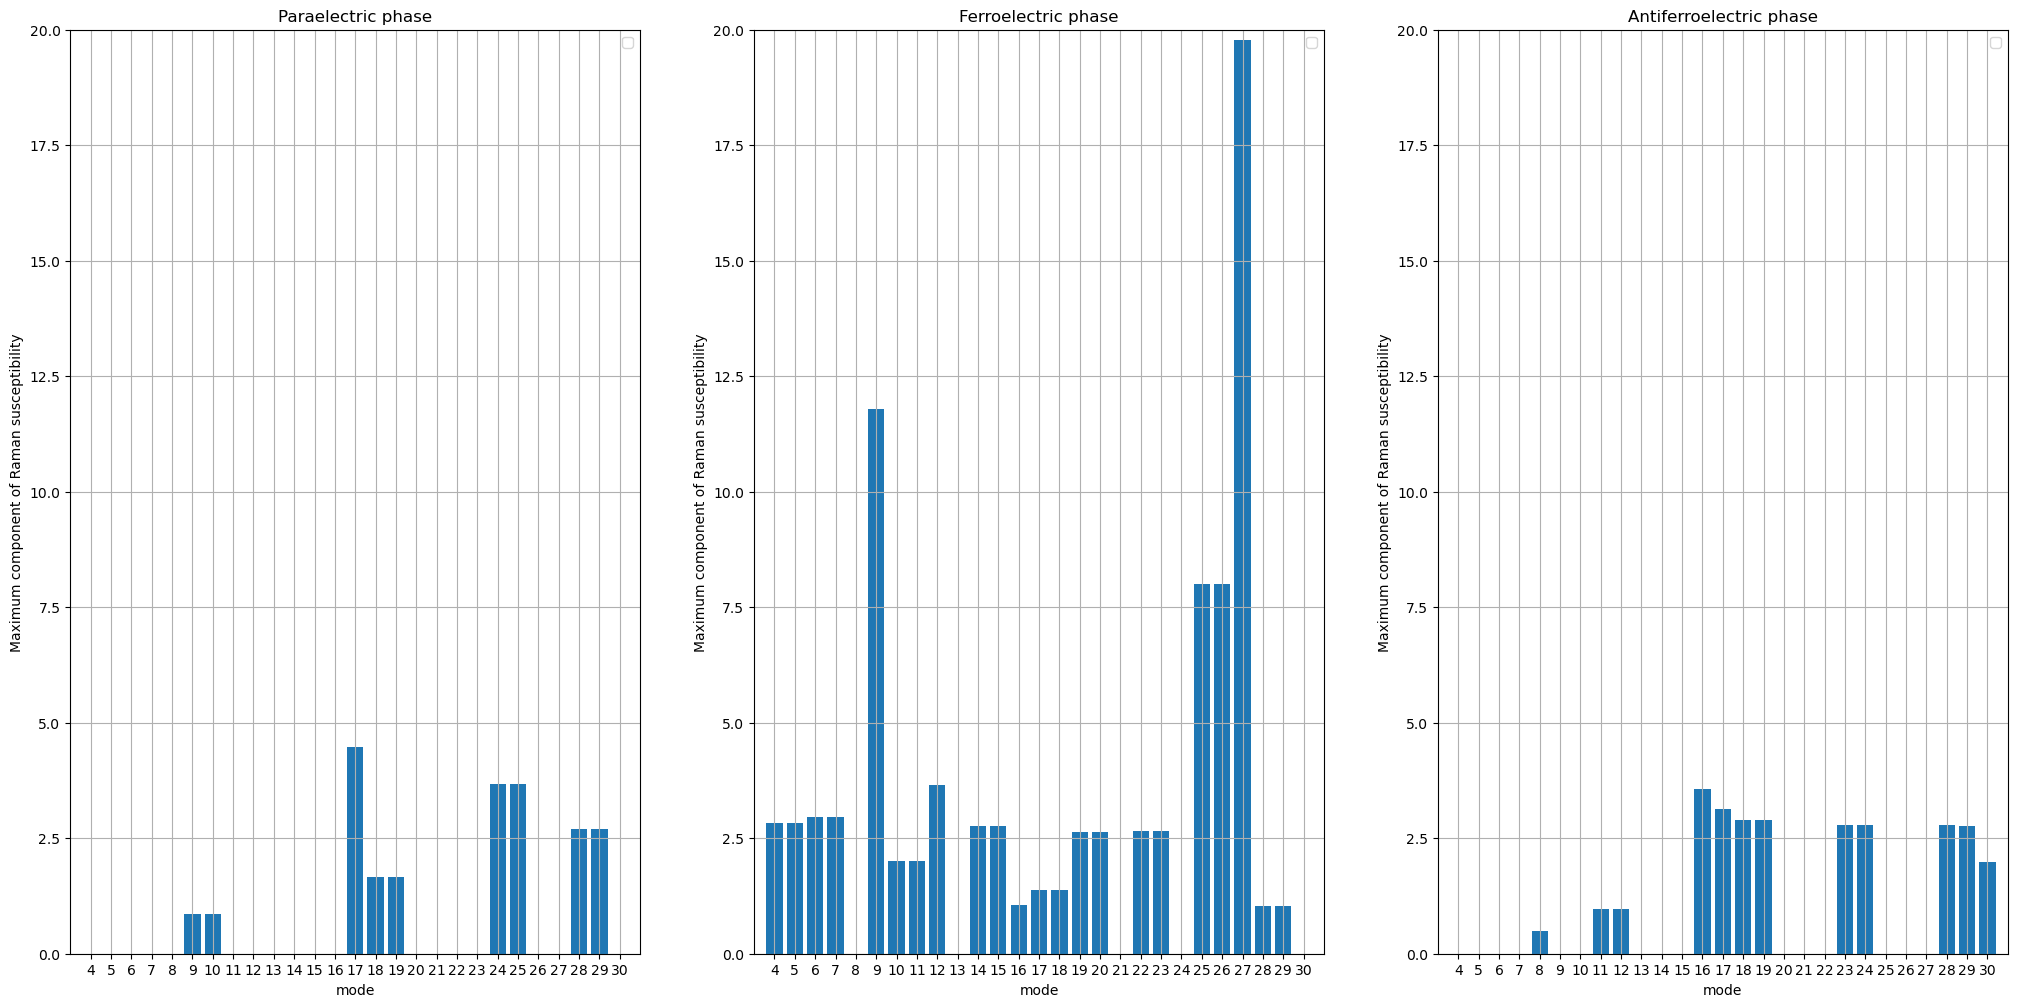

In [62]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(25, 12))
fig.dpi = 100
mode = np.arange(4, 31)



alpha_para = np.array([1.934837157583446e-06, 3.961643502249242e-07, 3.628130954836169e-07, 1.1690972182609844e-06, 3.569095944094808e-06, 0.0008669188220332508, 0.0008665345941620152, 1.9550508651292662e-06, 1.4976704263734278e-06, 3.721983092969288e-07, 2.116423066914305e-06, 2.004562132022227e-06, 1.5391174625042917e-06, 0.00447446335728292, 0.0016503209705225738, 0.0016509499033744092, 4.882632214233701e-07, 2.2314291227727874e-06, 1.8082508191601666e-06, 2.68032691623069e-06, 0.003674175070216696, 0.0036729001215958347, 1.835262762005599e-06, 1.7620460164804982e-06, 0.0027013466632868754, 0.002701860601294937, 2.112479917014489e-06])
alpha_para = alpha_para * 1000
ax[0].bar(mode, alpha_para)
ax[0].axis([3, 31, 0, 20])
ax[0].set_ylabel('Maximum component of Raman susceptibility')
ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Paraelectric phase")
ax[0].legend()
ax[0].set_xticks(mode)

alpha_ferro = np.array([0.0028346387458101983, 0.0028349199482085117, 0.002949764364509604, 0.0029497919133532014, 1.5877508199393876e-06, 0.01178227316595792, 0.0020010143142173043, 0.0020010409116314643, 0.003659391502196125, 1.002207314685645e-06, 0.002761408227365205, 0.002762242707751783, 0.0010598816321377002, 0.0013897905815537482, 0.001390065040156023, 0.0026289132387332633, 0.0026262109787402394, 9.064636393020617e-07, 0.0026552757028822233, 0.0026544331397152657, 1.6309441284089716e-06, 0.008007909902502731, 0.008007089005186003, 0.01977367998584801, 0.0010418679253160002, 0.0010423372310048363, 3.663783852646899e-07])
alpha_ferro = alpha_ferro * 1000
ax[1].bar(mode, alpha_ferro)
ax[1].axis([3, 31, 0, 20])
ax[1].set_ylabel('Maximum component of Raman susceptibility')
ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Ferroelectric phase")
ax[1].legend()
ax[1].set_xticks(mode)

alpha_antiferro = np.array([3.323798639912937e-07, 1.9128792891595366e-06, 4.964065201466867e-07, 2.1901822286601746e-06, 0.0004889530728899363, 1.1711295595416048e-06, 2.36160257503133e-06, 0.0009742850068880208, 0.0009747670285538352, 1.971168814204171e-06, 2.3087440432138803e-06, 1.6043064278903046e-06, 0.003573733224140907, 0.00312410976376521, 0.002888448316444949, 0.0028886200816855886, 1.6196574594006587e-06, 1.5222689420327164e-06, 1.0956057303596995e-06, 0.002778053472047275, 0.002777482392399764, 3.385549926214824e-06, 1.8806275087954881e-06, 1.8354544735591251e-06, 0.0027757112701084783, 0.002774713988933662, 0.0019882279544704844])
alpha_antiferro = alpha_antiferro*1000
ax[2].bar(mode, alpha_antiferro)
ax[2].axis([3, 31, 0, 20])
ax[2].set_ylabel('Maximum component of Raman susceptibility')
ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Antiferroelectric phase")
ax[2].legend()
ax[2].set_xticks(mode)


# fig.suptitle("Raman susceptibility")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


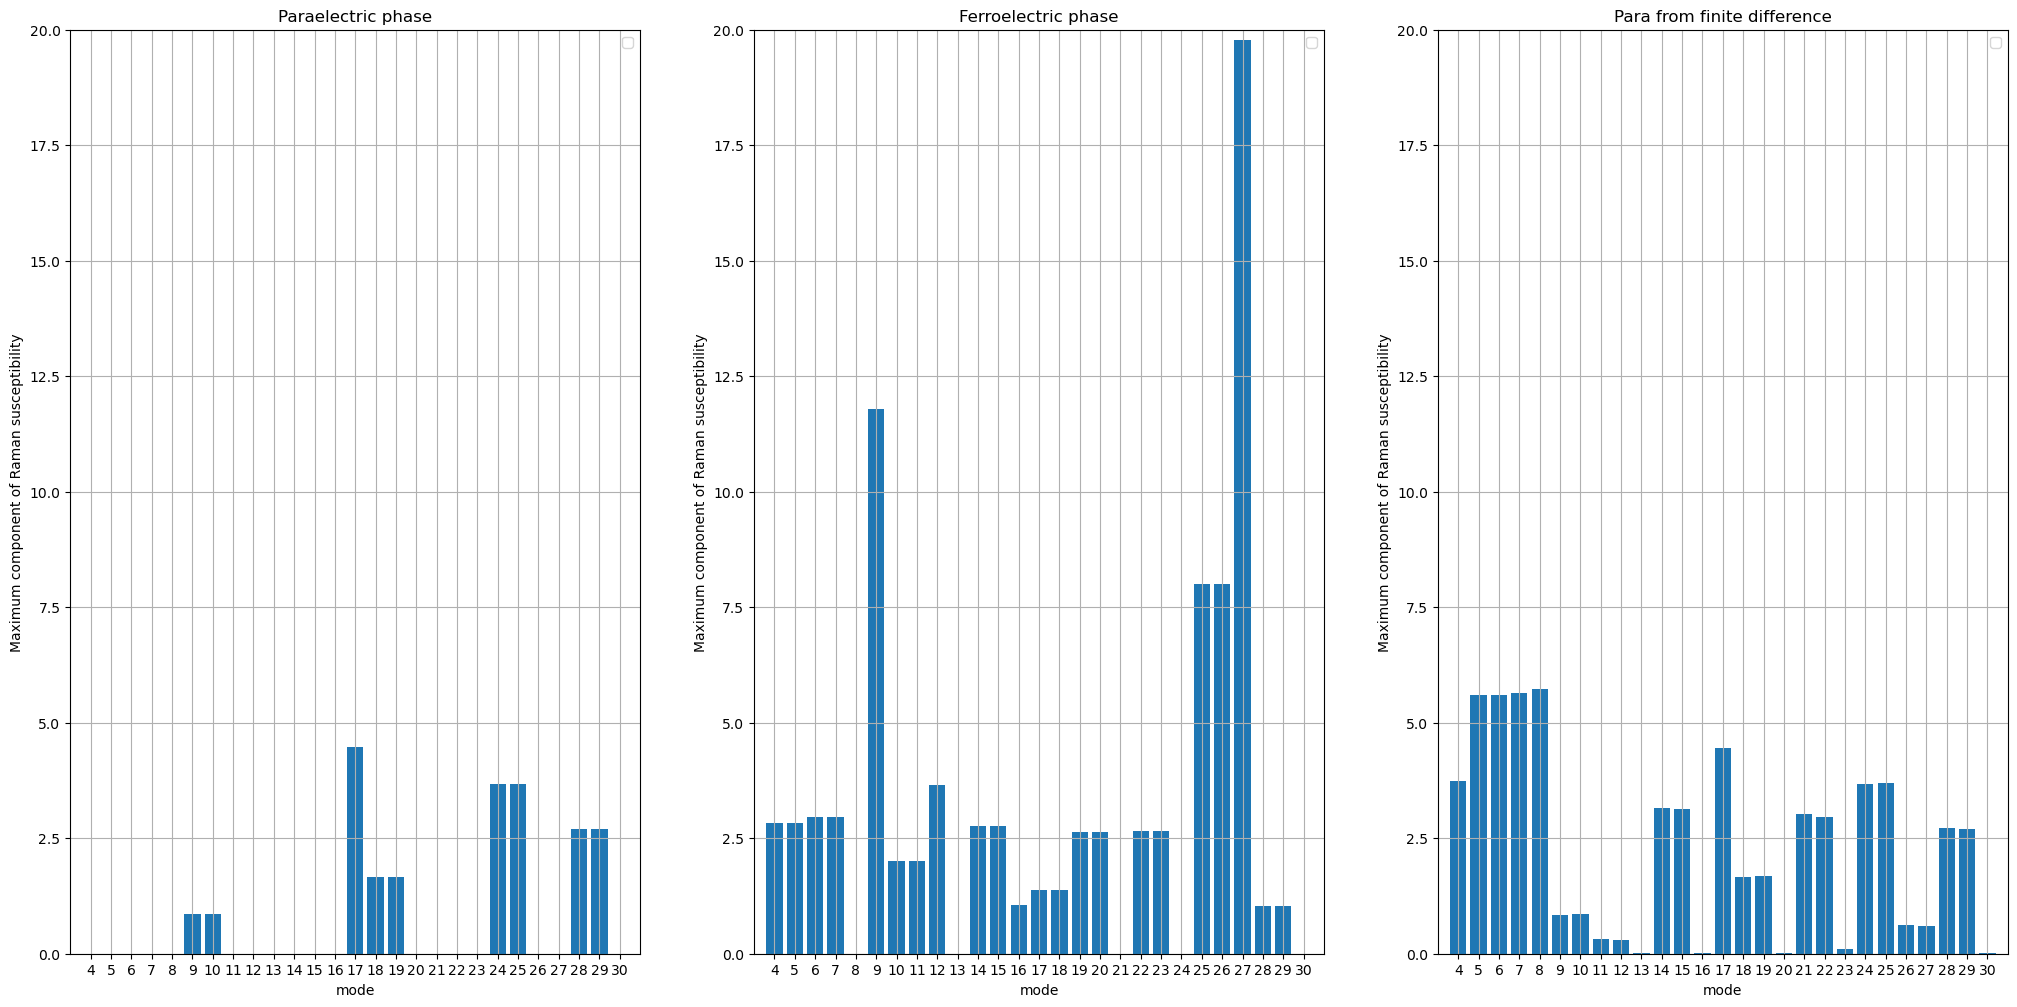

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(25, 12))
fig.dpi = 100
mode = np.arange(4, 31)



alpha_para = np.array([1.934837157583446e-06, 3.961643502249242e-07, 3.628130954836169e-07, 1.1690972182609844e-06, 3.569095944094808e-06, 0.0008669188220332508, 0.0008665345941620152, 1.9550508651292662e-06, 1.4976704263734278e-06, 3.721983092969288e-07, 2.116423066914305e-06, 2.004562132022227e-06, 1.5391174625042917e-06, 0.00447446335728292, 0.0016503209705225738, 0.0016509499033744092, 4.882632214233701e-07, 2.2314291227727874e-06, 1.8082508191601666e-06, 2.68032691623069e-06, 0.003674175070216696, 0.0036729001215958347, 1.835262762005599e-06, 1.7620460164804982e-06, 0.0027013466632868754, 0.002701860601294937, 2.112479917014489e-06])
alpha_para = alpha_para * 1000
ax[0].bar(mode, alpha_para)
ax[0].axis([3, 31, 0, 20])
ax[0].set_ylabel('Maximum component of Raman susceptibility')
ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Paraelectric phase")
ax[0].legend()
ax[0].set_xticks(mode)

alpha_ferro = np.array([0.0028346387458101983, 0.0028349199482085117, 0.002949764364509604, 0.0029497919133532014, 1.5877508199393876e-06, 0.01178227316595792, 0.0020010143142173043, 0.0020010409116314643, 0.003659391502196125, 1.002207314685645e-06, 0.002761408227365205, 0.002762242707751783, 0.0010598816321377002, 0.0013897905815537482, 0.001390065040156023, 0.0026289132387332633, 0.0026262109787402394, 9.064636393020617e-07, 0.0026552757028822233, 0.0026544331397152657, 1.6309441284089716e-06, 0.008007909902502731, 0.008007089005186003, 0.01977367998584801, 0.0010418679253160002, 0.0010423372310048363, 3.663783852646899e-07])
alpha_ferro = alpha_ferro * 1000
ax[1].bar(mode, alpha_ferro)
ax[1].axis([3, 31, 0, 20])
ax[1].set_ylabel('Maximum component of Raman susceptibility')
ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Ferroelectric phase")
ax[1].legend()
ax[1].set_xticks(mode)

alpha_antiferro = np.array([0.003744247309189281, 0.005598909833441209, 0.005595435050453571, 0.00564414023724931, 0.005735265300842211, 0.000844889279921622, 0.0008556241392548283, 0.0003201376355984093, 0.0003035155721474002, 8.84447892952651e-06, 0.0031504707099938396, 0.0031416309699246908, 1.7153393434285025e-05, 0.004457906657447675, 0.0016614430157203576, 0.001678431780337976, 1.3754375796175763e-05, 0.0030183814244561084, 0.002961094790413741, 0.00010868140519023217, 0.0036667860179436067, 0.003686277858588731, 0.0006219493808100593, 0.0006058365178370896, 0.0027217233119261695, 0.0027102262432229037, 2.1702192077097283e-05])
alpha_antiferro = alpha_antiferro*1000
ax[2].bar(mode, alpha_antiferro)
ax[2].axis([3, 31, 0, 20])
ax[2].set_ylabel('Maximum component of Raman susceptibility')
ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Para from finite difference")
ax[2].legend()
ax[2].set_xticks(mode)


# fig.suptitle("Raman susceptibility")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


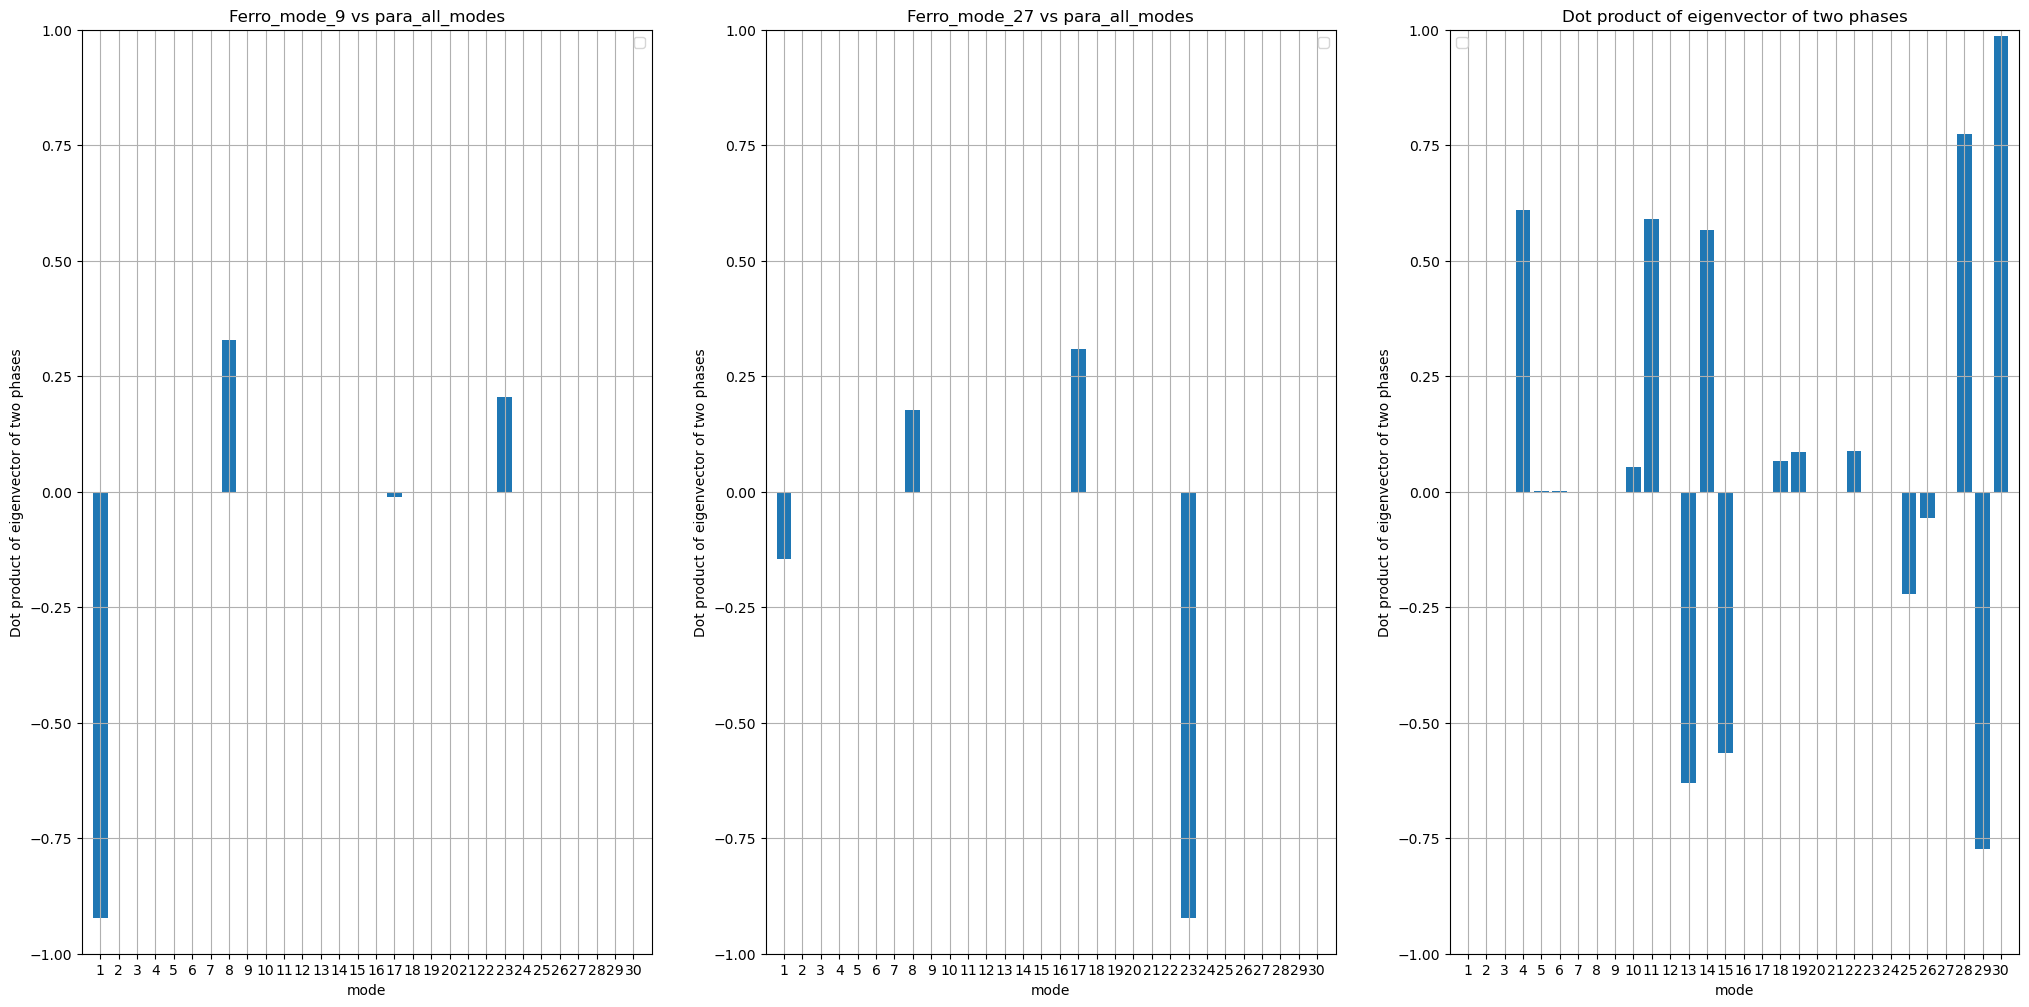

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(25, 12))
fig.dpi = 100
mode = np.arange(1, 31)

ax[0].bar(mode, ferro_mode9_para_all)
ax[0].axis([0, 31, -1, 1])
ax[0].set_ylabel('Dot product of eigenvector of two phases')
ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Ferro_mode_9 vs para_all_modes")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, ferro_mode27_para_all)
ax[1].axis([0, 31, -1, 1])
ax[1].set_ylabel('Dot product of eigenvector of two phases')
ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Ferro_mode_27 vs para_all_modes")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, ferro_mode_para_mode)
ax[2].axis([0, 31, -1, 1])
ax[2].set_ylabel('Dot product of eigenvector of two phases')
ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Dot product of eigenvector of two phases")
ax[2].legend()
ax[2].set_xticks(mode)


# fig.suptitle("Raman susceptibility")

In [6]:
ferro_mode9_para_all

[-0.9222261113798241,
 0.0,
 6.727257639838058e-15,
 3.7816971776294395e-15,
 -1.9104440251993537e-12,
 -3.1051550219984847e-15,
 -0.0006331219369877239,
 0.3276526166289898,
 8.049116928532385e-16,
 8.049116928532385e-16,
 -5.620504062164855e-15,
 -2.7755575615628914e-16,
 5.329070518200751e-15,
 1.8318679906315083e-15,
 0.0,
 1.304512053934559e-15,
 -0.011225132889354806,
 -6.800116025829084e-16,
 1.942890293094024e-15,
 -4.6074255521944e-15,
 9.298117831235686e-16,
 0.0,
 0.20497892051058758,
 0.0,
 -2.0122792321330962e-15,
 5.898059818321144e-15,
 0.0,
 0.0,
 -2.192690473634684e-15,
 0.0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


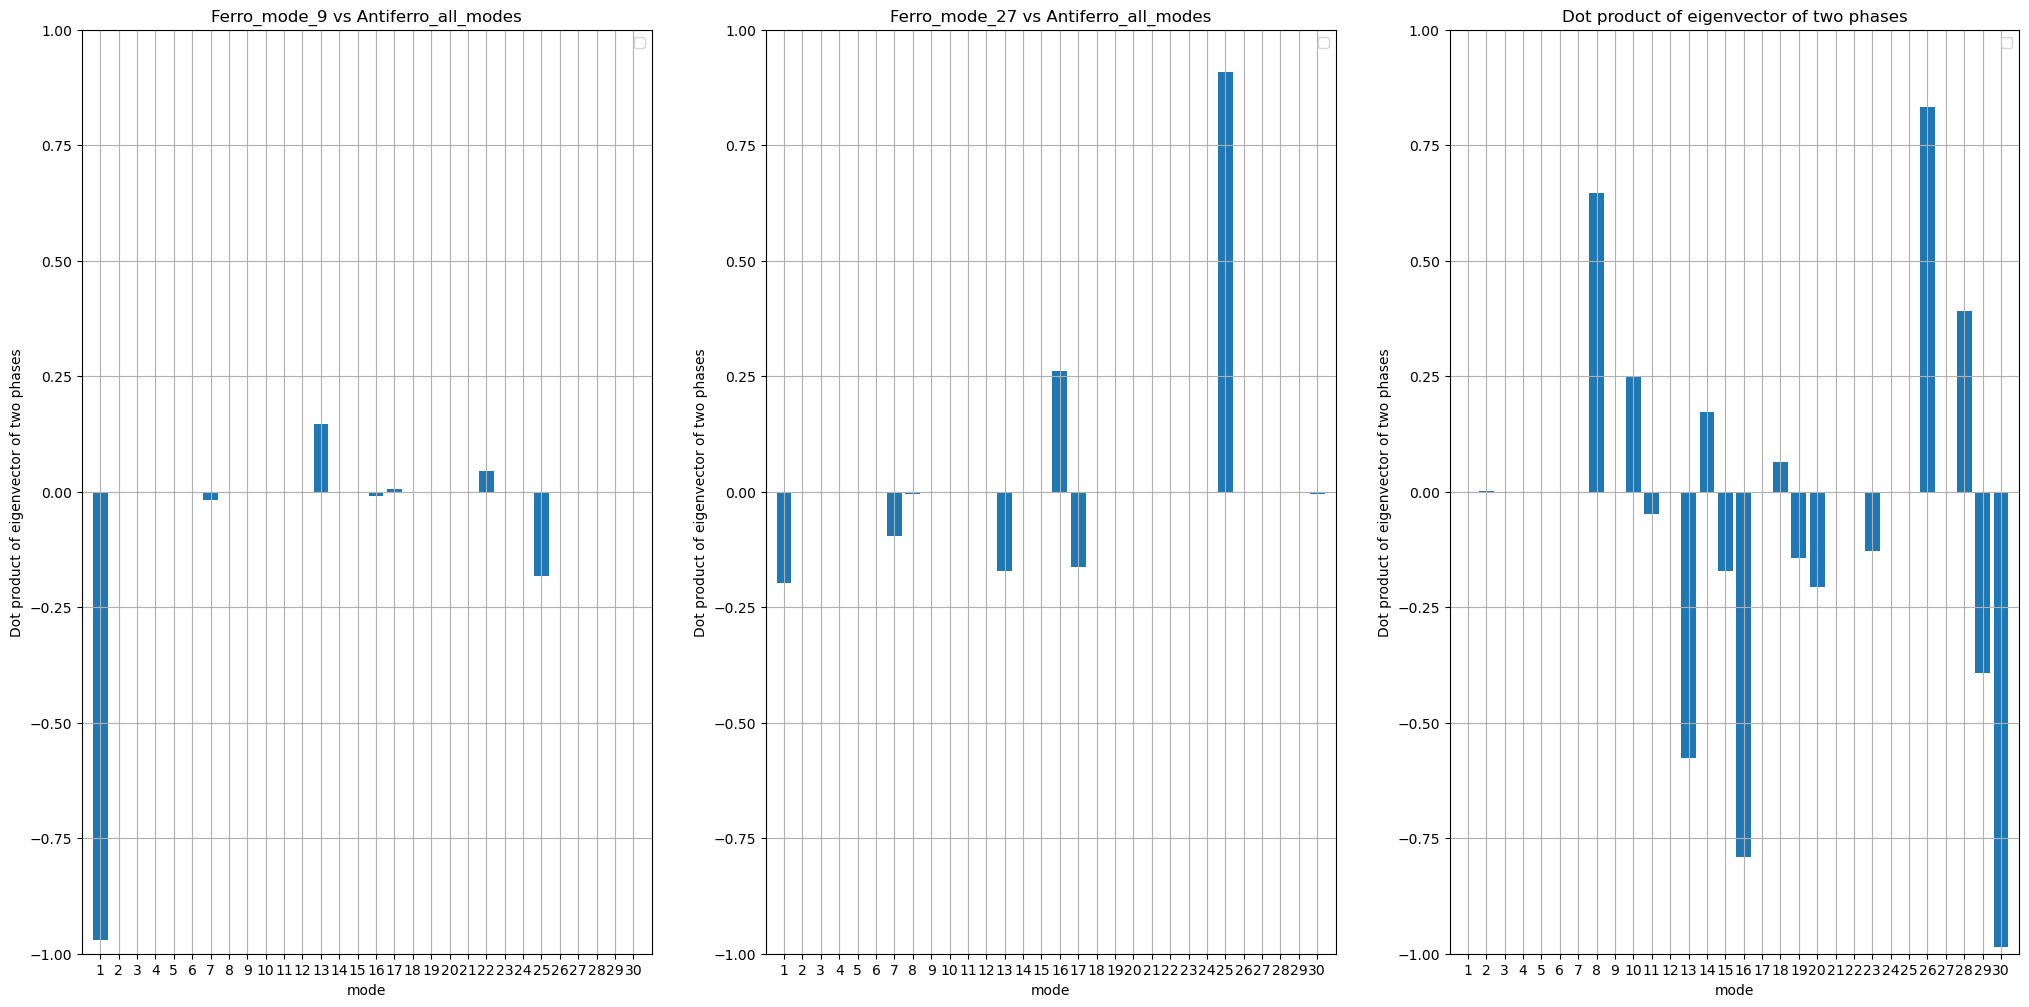

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(25, 12))
fig.dpi = 100
mode = np.arange(1, 31)

ax[0].bar(mode, ferro_mode9_anti_all)
ax[0].axis([0, 31, -1, 1])
ax[0].set_ylabel('Dot product of eigenvector of two phases')
ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Ferro_mode_9 vs Antiferro_all_modes")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, ferro_mode27_anti_all)
ax[1].axis([0, 31, -1, 1])
ax[1].set_ylabel('Dot product of eigenvector of two phases')
ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Ferro_mode_27 vs Antiferro_all_modes")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, ferro_mode_anti_mode)
ax[2].axis([0, 31, -1, 1])
ax[2].set_ylabel('Dot product of eigenvector of two phases')
ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Dot product of eigenvector of two phases")
ax[2].legend()
ax[2].set_xticks(mode)


# fig.suptitle("Raman susceptibility")

In [9]:
ferro_mode9_anti_all

[-0.9712109504506573,
 1.4918621893400541e-15,
 3.400058012914542e-16,
 -0.00022678337342281474,
 -1.97758476261356e-16,
 7.64110996698264e-14,
 -0.017460465173364397,
 0.00017001829099913546,
 -4.85722573273506e-15,
 6.8035854727810374e-15,
 -1.1518563880486e-15,
 -7.771561172376096e-16,
 0.14593828048883328,
 -1.3183898417423734e-16,
 -2.5569824035898137e-15,
 -0.009528045244943079,
 0.00592994941391585,
 -2.7755575615628914e-16,
 5.342948306008566e-16,
 -1.654926196081874e-15,
 6.598888102615774e-15,
 0.044105708572812354,
 -3.0184188481996443e-16,
 2.5604518505417673e-15,
 -0.18186553164586997,
 5.828670879282072e-16,
 4.121702978920894e-15,
 2.1510571102112408e-15,
 1.3877787807814457e-17,
 0.0001635723788597082]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


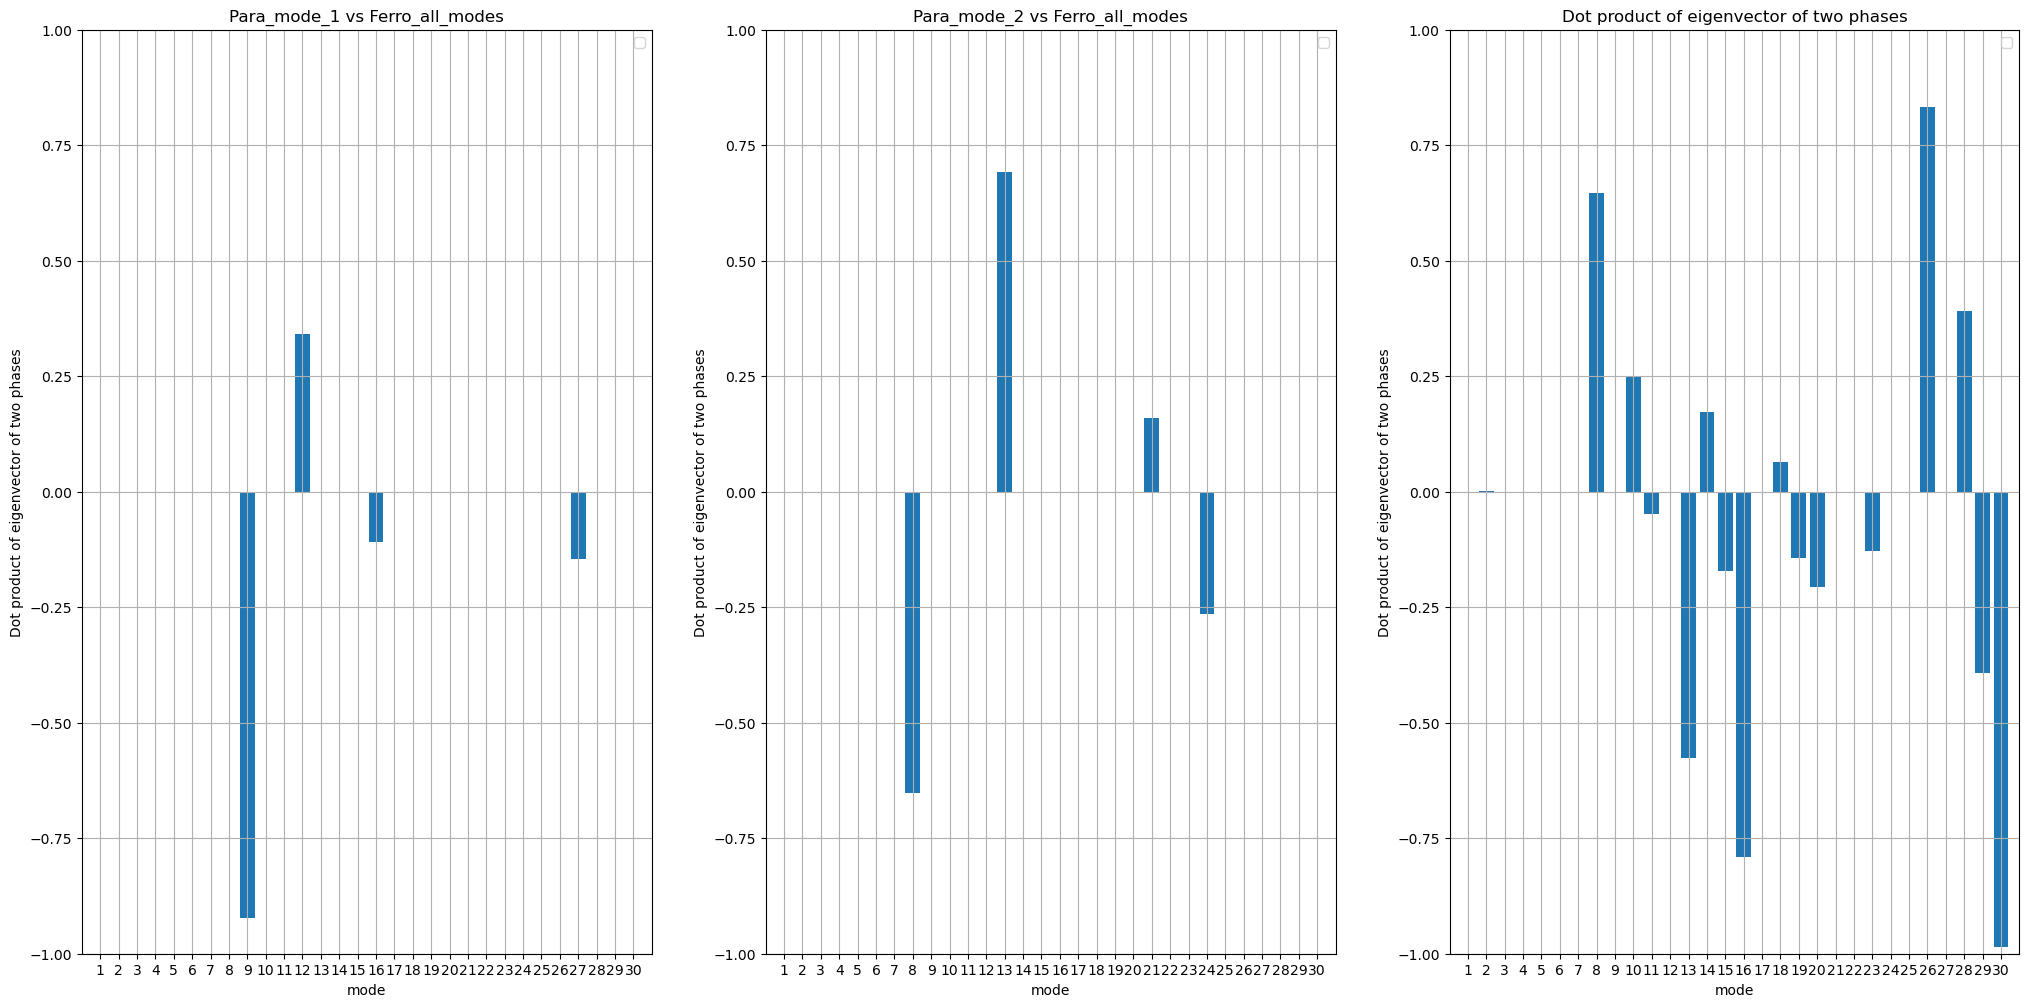

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(25, 12))
fig.dpi = 100
mode = np.arange(1, 31)

ax[0].bar(mode, para_mode1_ferro_all)
ax[0].axis([0, 31, -1, 1])
ax[0].set_ylabel('Dot product of eigenvector of two phases')
ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Para_mode_1 vs Ferro_all_modes")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, pare_mode2_ferro_all)
ax[1].axis([0, 31, -1, 1])
ax[1].set_ylabel('Dot product of eigenvector of two phases')
ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Para_mode_2 vs Ferro_all_modes")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, ferro_mode_para_mode)
ax[2].axis([0, 31, -1, 1])
ax[2].set_ylabel('Dot product of eigenvector of two phases')
ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Dot product of eigenvector of two phases")
ax[2].legend()
ax[2].set_xticks(mode)


# fig.suptitle("Raman susceptibility")

In [ ]:
matrix_anti = np.array([[ 1.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
         0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.],
       [ 0.,  1., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
        -0.,  0.,  0.,  0.],
       [-0., -0.,  1.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        -0., -0.,  0., -0.],
       [ 0., -0.,  0.,  1., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
        -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        -0.,  0.,  0., -0.],
       [ 0., -0.,  0., -0.,  1., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
        -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0.,  0.],
       [-0., -0., -0., -0., -0.,  1.,  0.,  0., -0., -0.,  0.,  0., -0.,
        -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
        -0.,  0.,  0., -0.],
       [ 0., -0., -0., -0.,  0.,  0.,  1.,  0.,  0., -0., -0., -0., -0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
         0.,  0.,  0., -0.],
       [ 0.,  0.,  0., -0., -0.,  0.,  0.,  1., -0.,  0.,  0.,  0., -0.,
        -0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0., -0.],
       [ 0., -0.,  0., -0., -0., -0.,  0., -0.,  1.,  0.,  0., -0.,  0.,
        -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,
         0.,  0., -0.,  0.],
       [-0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  1.,  0., -0., -0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,
         0., -0., -0.,  0.],
       [ 0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        -0., -0., -0.,  0.],
       [-0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  1.,  0.,
         0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0.,
         0., -0., -0.,  0.],
       [-0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  1.,
        -0.,  0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
        -0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
         1.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  0., -0.,  0.],
       [-0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,
         0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,
         0.,  0.,  1.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        -0., -0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,
        -0.,  0.,  0.,  1., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
         0.,  0., -0., -0.],
       [ 0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        -0.,  0.,  0., -0.,  1.,  0., -0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
         0.,  0., -0.,  0.,  0.,  1., -0.,  0., -0., -0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [-0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
         0., -0.,  0.,  0., -0., -0.,  1.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
         0., -0.,  0.,  0.,  0.,  0.,  0.,  1., -0., -0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.],
       [ 0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,
        -0.,  0.,  0., -0., -0., -0., -0., -0.,  1.,  0.,  0., -0., -0.,
         0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,
        -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  1., -0.,  0., -0.,
        -0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  1., -0.,  0.,
        -0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,
         0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  1., -0.,
        -0.,  0., -0., -0.],
       [ 0., -0., -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  1.,
         0., -0., -0.,  0.],
       [ 0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,
         1.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,
         0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  1.,  0., -0.],
       [-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,
        -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,
         0.,  0.,  1., -0.],
       [ 0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
         0., -0., -0.,  1.]])

In [37]:
## Extract the phonon frequencies and the corresponding eigenvectors.
# The POSCAR in the function only specify the atoms
n_atom = 10 
def get_phonons(qpoint_file, band=4, poscar='VASP_files/POSCAR'):
    with open(qpoint_file, 'r') as file:
        data = yaml.safe_load(file)

    freq = data['phonon'][0]['band'][band-1]['frequency']     # frequency of band
    eig = np.array(data['phonon'][0]['band'][band-1]['eigenvector'])      # eigenvector of band
    eig = eig[:,:,0]
    ## Mass normalized eigendisplacements? Or just eigenvectors?
    
    structure = ase.io.read(poscar)
    mass = structure.get_masses()
    eig = eig / np.sqrt(np.tile(mass, (3,1)).T)     # eigendisplacements = eigenvectors / sqrt(mass).
    
    
    return (freq, eig)

###
config_ferro = "VASP_files/band.yaml"
###

eig_4 = get_phonons(config_ferro, band=4)[1]
eig_9 = get_phonons(config_ferro, band=9)[1]
print("the normalized eigenvector 4 is:")
print(eig_4)
print()
print("the normalized eigenvector 9 is:")
print(eig_9)

the normalized eigenvector 4 is:
[[ 0.          0.05028725  0.        ]
 [-0.01639687 -0.04753893 -0.        ]
 [-0.0258408  -0.02629032  0.        ]
 [-0.0158562   0.03327925  0.        ]
 [ 0.02103766 -0.05920667  0.0699984 ]
 [ 0.03831108 -0.0476089  -0.01286225]
 [ 0.03971834 -0.068367   -0.05713614]
 [ 0.03866324  0.04129569 -0.05783811]
 [ 0.05333611  0.05604649  0.06961231]
 [ 0.05877425  0.03596401 -0.01177419]]

the normalized eigenvector 9 is:
[[ 0.          0.         -0.04642244]
 [-0.          0.         -0.04642244]
 [ 0.          0.         -0.03753506]
 [-0.          0.         -0.03753506]
 [ 0.00803796 -0.03198169  0.07931676]
 [ 0.02367798  0.02295192  0.07931676]
 [-0.03171594  0.00902977  0.07931676]
 [-0.00803796 -0.03198169  0.07931676]
 [ 0.03171594  0.00902977  0.07931676]
 [-0.02367798  0.02295192  0.07931676]]


In [182]:

poscar='VASP_files/POSCAR'
structure = ase.io.read(poscar)
print("the original positions are:")
print(structure.get_scaled_positions(), sep='\n')
print()
for i in range(4,10):
    eig = get_phonons(config_ferro, band=i)[1]
    eig_applied = eig  + structure.get_scaled_positions()
    print()
    print("the position after applying eigenvector {} is:".format(i))
    print(*[str(row)[1:-2] for row in eig_applied], sep='\n')



the original positions are:
[[0.71729882 0.71729882 0.71729882]
 [0.21729882 0.21729882 0.21729882]
 [0.00104403 0.00104403 0.00104403]
 [0.50104403 0.50104403 0.50104403]
 [0.89445664 0.63084905 0.28275146]
 [0.28275146 0.89445664 0.63084905]
 [0.63084905 0.28275146 0.89445664]
 [0.13084905 0.39445664 0.78275146]
 [0.78275146 0.13084905 0.39445664]
 [0.39445664 0.78275146 0.13084905]]


the position after applying eigenvector 4 is:
0.71729882 0.76758607 0.7172988
0.20090195 0.16975989 0.2172988
-0.02479677 -0.0252463   0.0010440
0.48518782 0.53432328 0.5010440
0.9154943  0.57164238 0.3527498
0.32106254 0.84684774 0.6179868
0.67056739 0.21438446 0.8373205
0.1695123  0.43575233 0.7249133
0.83608757 0.18689554 0.4640689
0.45323089 0.81871547 0.1190748

the position after applying eigenvector 5 is:
0.76758607 0.71729882 0.7172988
0.16975989 0.2336957  0.2172988
-0.0252463   0.02688482  0.0010440
0.53432328 0.51690023 0.5010440
0.83687493 0.58584199 0.308313 
0.21357198 0.866723   0.557447

In [91]:
def bond_len(poscar_array, i, j):
    # distance between two atoms
    return np.sqrt(np.sum(((poscar_array[i] - poscar_array[j]))**2))

orig_bond_length = np.array([])
for k in [4, 5, 6, 7, 8, 9]: # oxygen atoms
    orig_bond_length = np.append(orig_bond_length, bond_len(structure.get_scaled_positions(), 3, k))

eig4_bond_length = []
for k in [4, 5, 6, 7, 8, 9]: # oxygen atoms
    eig4_bond_length = np.append(eig4_bond_length, bond_len(eig_applied_4, 3, k))
    
eig9_bond_length = []
for k in [4, 5, 6, 7, 8, 9]: # oxygen atoms
    eig9_bond_length = np.append(eig9_bond_length, bond_len(eig_applied_9, 3, k))

lattice_const = np.linalg.norm(structure.get_cell()[0])
print("the original bonding lengths are:")
print(orig_bond_length)
print()
print("the bonding lengths after applying eigenvector 4 are:")
print(eig4_bond_length)
print()
print("the bonding lengths after applying eigenvector 9 are:")
print(eig9_bond_length)
print(structure.get_cell()[0])
print(lattice_const)

bond_orig = np.array([2.104, 2.104, 2.104, 1.9, 1.9, 1.9])
bond_eig4 = np.array([2.107, 1.729, 1.986, 1.640, 1.794, 1.804])
bond_eig9 = np.array([2.242, 2.692, 2.603, 2.103, 1.734, 1.541])

def rms(array):
    return np.sqrt(np.mean(array**2))
    
print(bond_orig - bond_eig4)
print(rms(bond_orig - bond_eig4))
print(rms(bond_orig - bond_eig9))

the original bonding lengths are:
[0.46826752 0.46826752 0.46826752 0.47724655 0.47724655 0.47724655]

the bonding lengths after applying eigenvector 4 are:
[0.45667006 0.37186591 0.49980826 0.39935541 0.4951806  0.47728462]

the bonding lengths after applying eigenvector 9 are:
[0.42546703 0.521607   0.56016264 0.56666659 0.47830939 0.41709608]
[2.55354571 1.47429031 4.60458843]
5.467756603398403


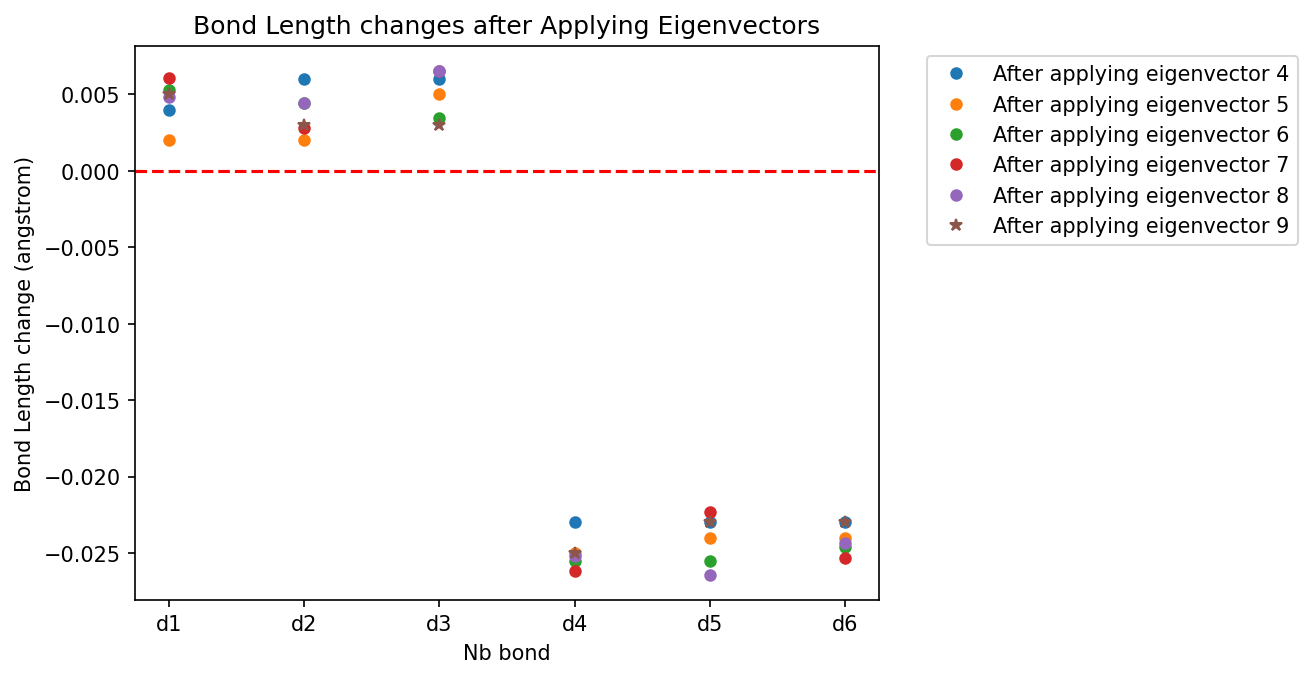

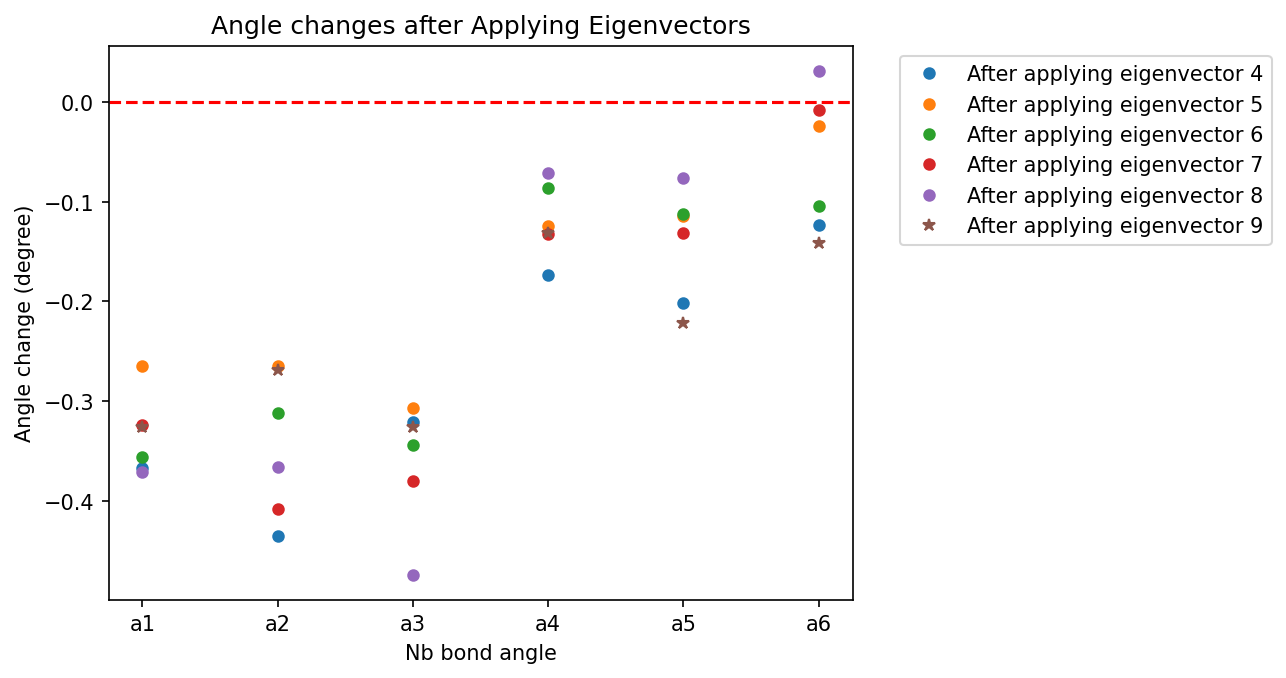

In [139]:
x = [1, 2, 3, 4, 5, 6]
xx = np.array(["d1", "d2", "d3", "d4", "d5", "d6"])
yy = np.array(["a1", "a2", "a3", "a4", "a5", "a6"])
bond_orig = np.array([2.107, 2.107, 2.107, 1.903, 1.903, 1.903])
bond_eig4 = np.array([2.111, 2.113, 2.113, 1.88, 1.88, 1.88])
bond_eig5 = np.array([2.109, 2.109, 2.112, 1.878, 1.879, 1.879])
bond_eig6 = np.array([2.11230, 2.11142, 2.11044, 1.87751, 1.87746, 1.87841])
bond_eig7 = np.array([2.11310, 2.10979, 2.11354, 1.87681, 1.88066, 1.87769])
bond_eig8 = np.array([2.11184, 2.11147, 2.11351, 1.87782, 1.87657, 1.87865])
bond_eig9 = np.array([2.112, 2.110, 2.110, 1.878, 1.880, 1.880])
angle_orig = np.array([80.33, 80.33, 80.33, 99.49, 99.49, 99.49])
angle_eig4 = np.array([79.963, 79.895, 80.009, 99.317, 99.288, 99.367])
angle_eig5 = np.array([80.0655, 80.0653, 80.0235, 99.3659, 99.3759, 99.4659])
angle_eig6 = np.array([79.9739, 80.0177, 79.9862, 99.4035, 99.3780, 99.3861])
angle_eig7 = np.array([80.006, 79.9213, 79.9495, 99.3575, 99.3586, 99.4826])
angle_eig8 = np.array([79.9588, 79.9638, 79.8556, 99.4189, 99.4134, 99.5214])
angle_eig9 = np.array([80.004, 80.061, 80.004, 99.359, 99.268, 99.349])




plt.rcParams['figure.dpi'] = 150
plt.figure()
# Plot the original bonding lengths as dots
# plt.plot(xx, bond_orig, marker='s', linestyle='None', label='Original bonding length', markersize=9)
plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.plot(xx, bond_eig4-bond_orig, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
plt.plot(xx, bond_eig5-bond_orig, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
plt.plot(xx, bond_eig6-bond_orig, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
plt.plot(xx, bond_eig7-bond_orig, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
plt.plot(xx, bond_eig8-bond_orig, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
plt.plot(xx, bond_eig9-bond_orig, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Add labels and title to the plot
plt.xlabel('Nb bond')
plt.ylabel('Bond Length change (angstrom)')
plt.title('Bond Length changes after Applying Eigenvectors')

# Move the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

plt.figure()
# Plot the original bonding lengths as dots
# plt.plot(xx, angle_orig, marker='s', linestyle='None', label='Original bonding length', markersize=9)
plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.plot(yy, angle_eig4-angle_orig, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
plt.plot(yy, angle_eig5-angle_orig, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
plt.plot(yy, angle_eig6-angle_orig, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
plt.plot(yy, angle_eig7-angle_orig, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
plt.plot(yy, angle_eig8-angle_orig, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
plt.plot(yy, angle_eig9-angle_orig, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Add labels and title to the plot
plt.xlabel('Nb bond angle')
plt.ylabel('Angle change (degree)')
plt.title('Angle changes after Applying Eigenvectors')

# Move the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


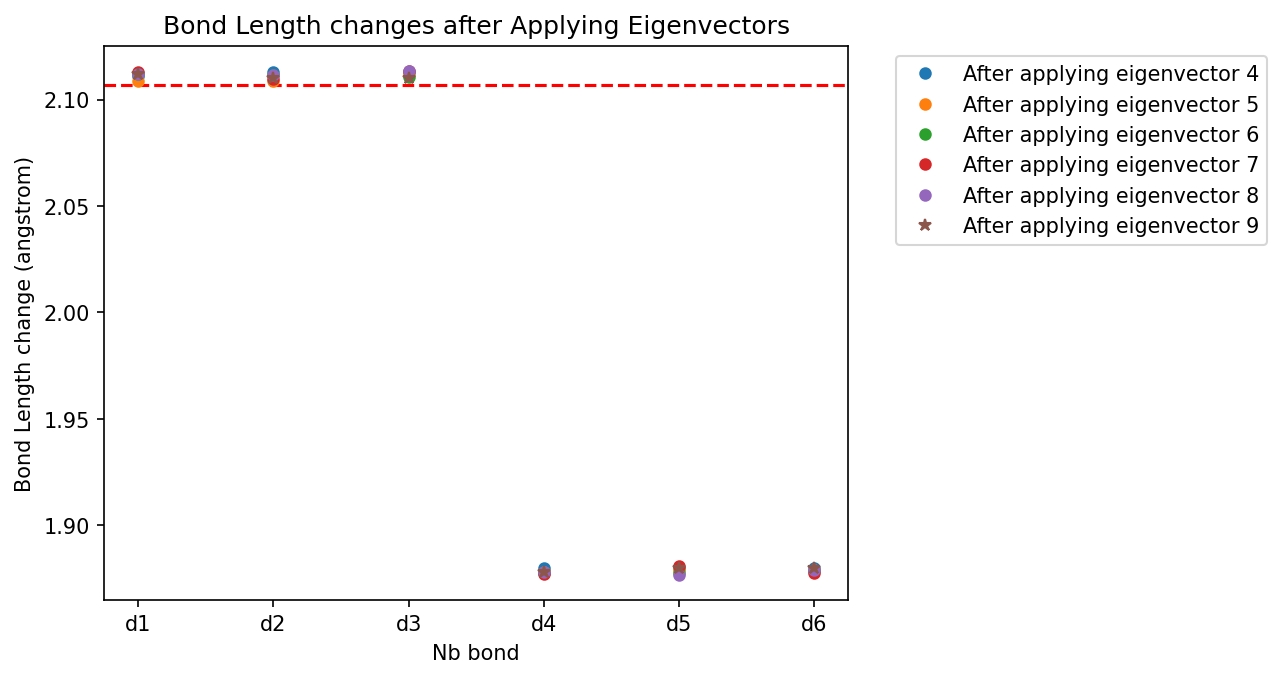

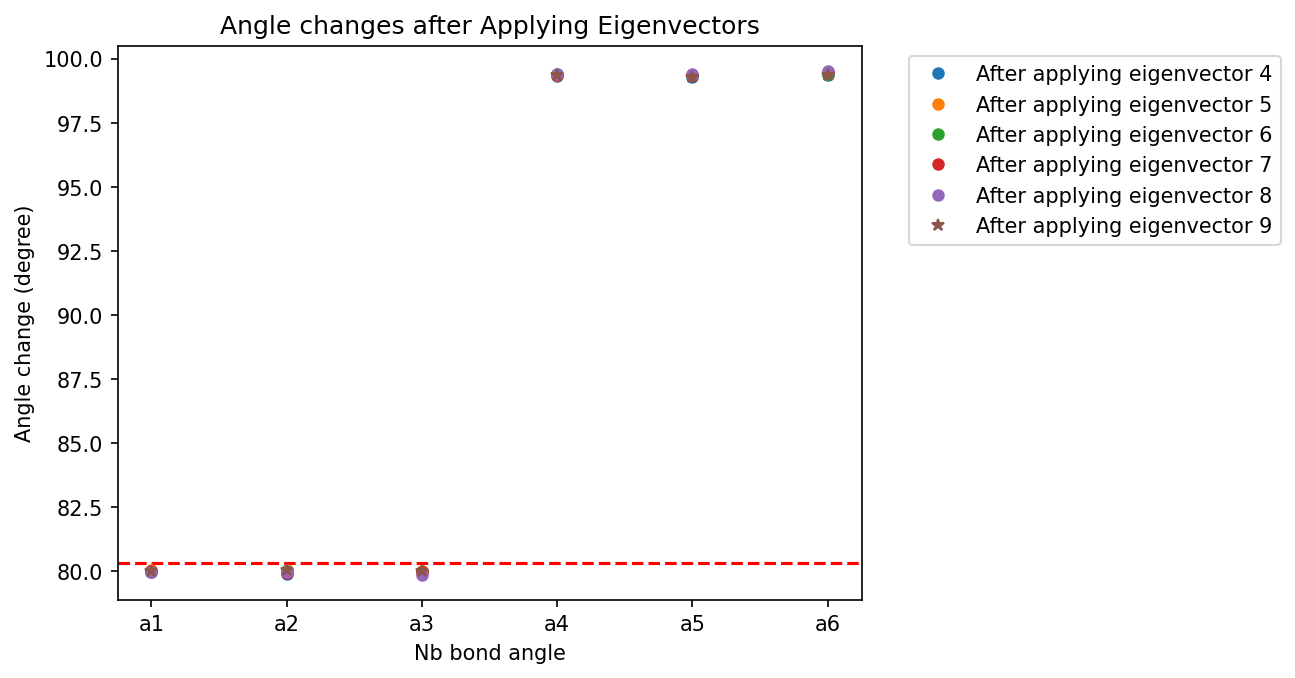

In [143]:
x = [1, 2, 3, 4, 5, 6]
xx = np.array(["d1", "d2", "d3", "d4", "d5", "d6"])
yy = np.array(["a1", "a2", "a3", "a4", "a5", "a6"])
bond_orig = np.array([2.107, 2.107, 2.107, 1.903, 1.903, 1.903])
bond_eig4 = np.array([2.111, 2.113, 2.113, 1.88, 1.88, 1.88])
bond_eig5 = np.array([2.109, 2.109, 2.112, 1.878, 1.879, 1.879])
bond_eig6 = np.array([2.11230, 2.11142, 2.11044, 1.87751, 1.87746, 1.87841])
bond_eig7 = np.array([2.11310, 2.10979, 2.11354, 1.87681, 1.88066, 1.87769])
bond_eig8 = np.array([2.11184, 2.11147, 2.11351, 1.87782, 1.87657, 1.87865])
bond_eig9 = np.array([2.112, 2.110, 2.110, 1.878, 1.880, 1.880])
angle_orig = np.array([80.33, 80.33, 80.33, 99.49, 99.49, 99.49])
angle_eig4 = np.array([79.963, 79.895, 80.009, 99.317, 99.288, 99.367])
angle_eig5 = np.array([80.0655, 80.0653, 80.0235, 99.3659, 99.3759, 99.4659])
angle_eig6 = np.array([79.9739, 80.0177, 79.9862, 99.4035, 99.3780, 99.3861])
angle_eig7 = np.array([80.006, 79.9213, 79.9495, 99.3575, 99.3586, 99.4826])
angle_eig8 = np.array([79.9588, 79.9638, 79.8556, 99.4189, 99.4134, 99.5214])
angle_eig9 = np.array([80.004, 80.061, 80.004, 99.359, 99.268, 99.349])




plt.rcParams['figure.dpi'] = 150
plt.figure()
# Plot the original bonding lengths as dots
# plt.plot(xx, bond_orig, marker='s', linestyle='None', label='Original bonding length', markersize=9)
plt.axhline(2.107, color='r', linestyle='--')  # Add horizontal line at y=0

plt.plot(xx, bond_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
plt.plot(xx, bond_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
plt.plot(xx, bond_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
plt.plot(xx, bond_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
plt.plot(xx, bond_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
plt.plot(xx, bond_eig9, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Add labels and title to the plot
plt.xlabel('Nb bond')
plt.ylabel('Bond Length change (angstrom)')
plt.title('Bond Length changes after Applying Eigenvectors')

# Move the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

plt.figure()
# Plot the original bonding lengths as dots
# plt.plot(xx, angle_orig, marker='s', linestyle='None', label='Original bonding length', markersize=9)
plt.axhline(80.33, color='r', linestyle='--')  # Add horizontal line at y=0
plt.plot(yy, angle_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
plt.plot(yy, angle_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
plt.plot(yy, angle_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
plt.plot(yy, angle_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
plt.plot(yy, angle_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
plt.plot(yy, angle_eig9, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Add labels and title to the plot
plt.xlabel('Nb bond angle')
plt.ylabel('Angle change (degree)')
plt.title('Angle changes after Applying Eigenvectors')

# Move the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


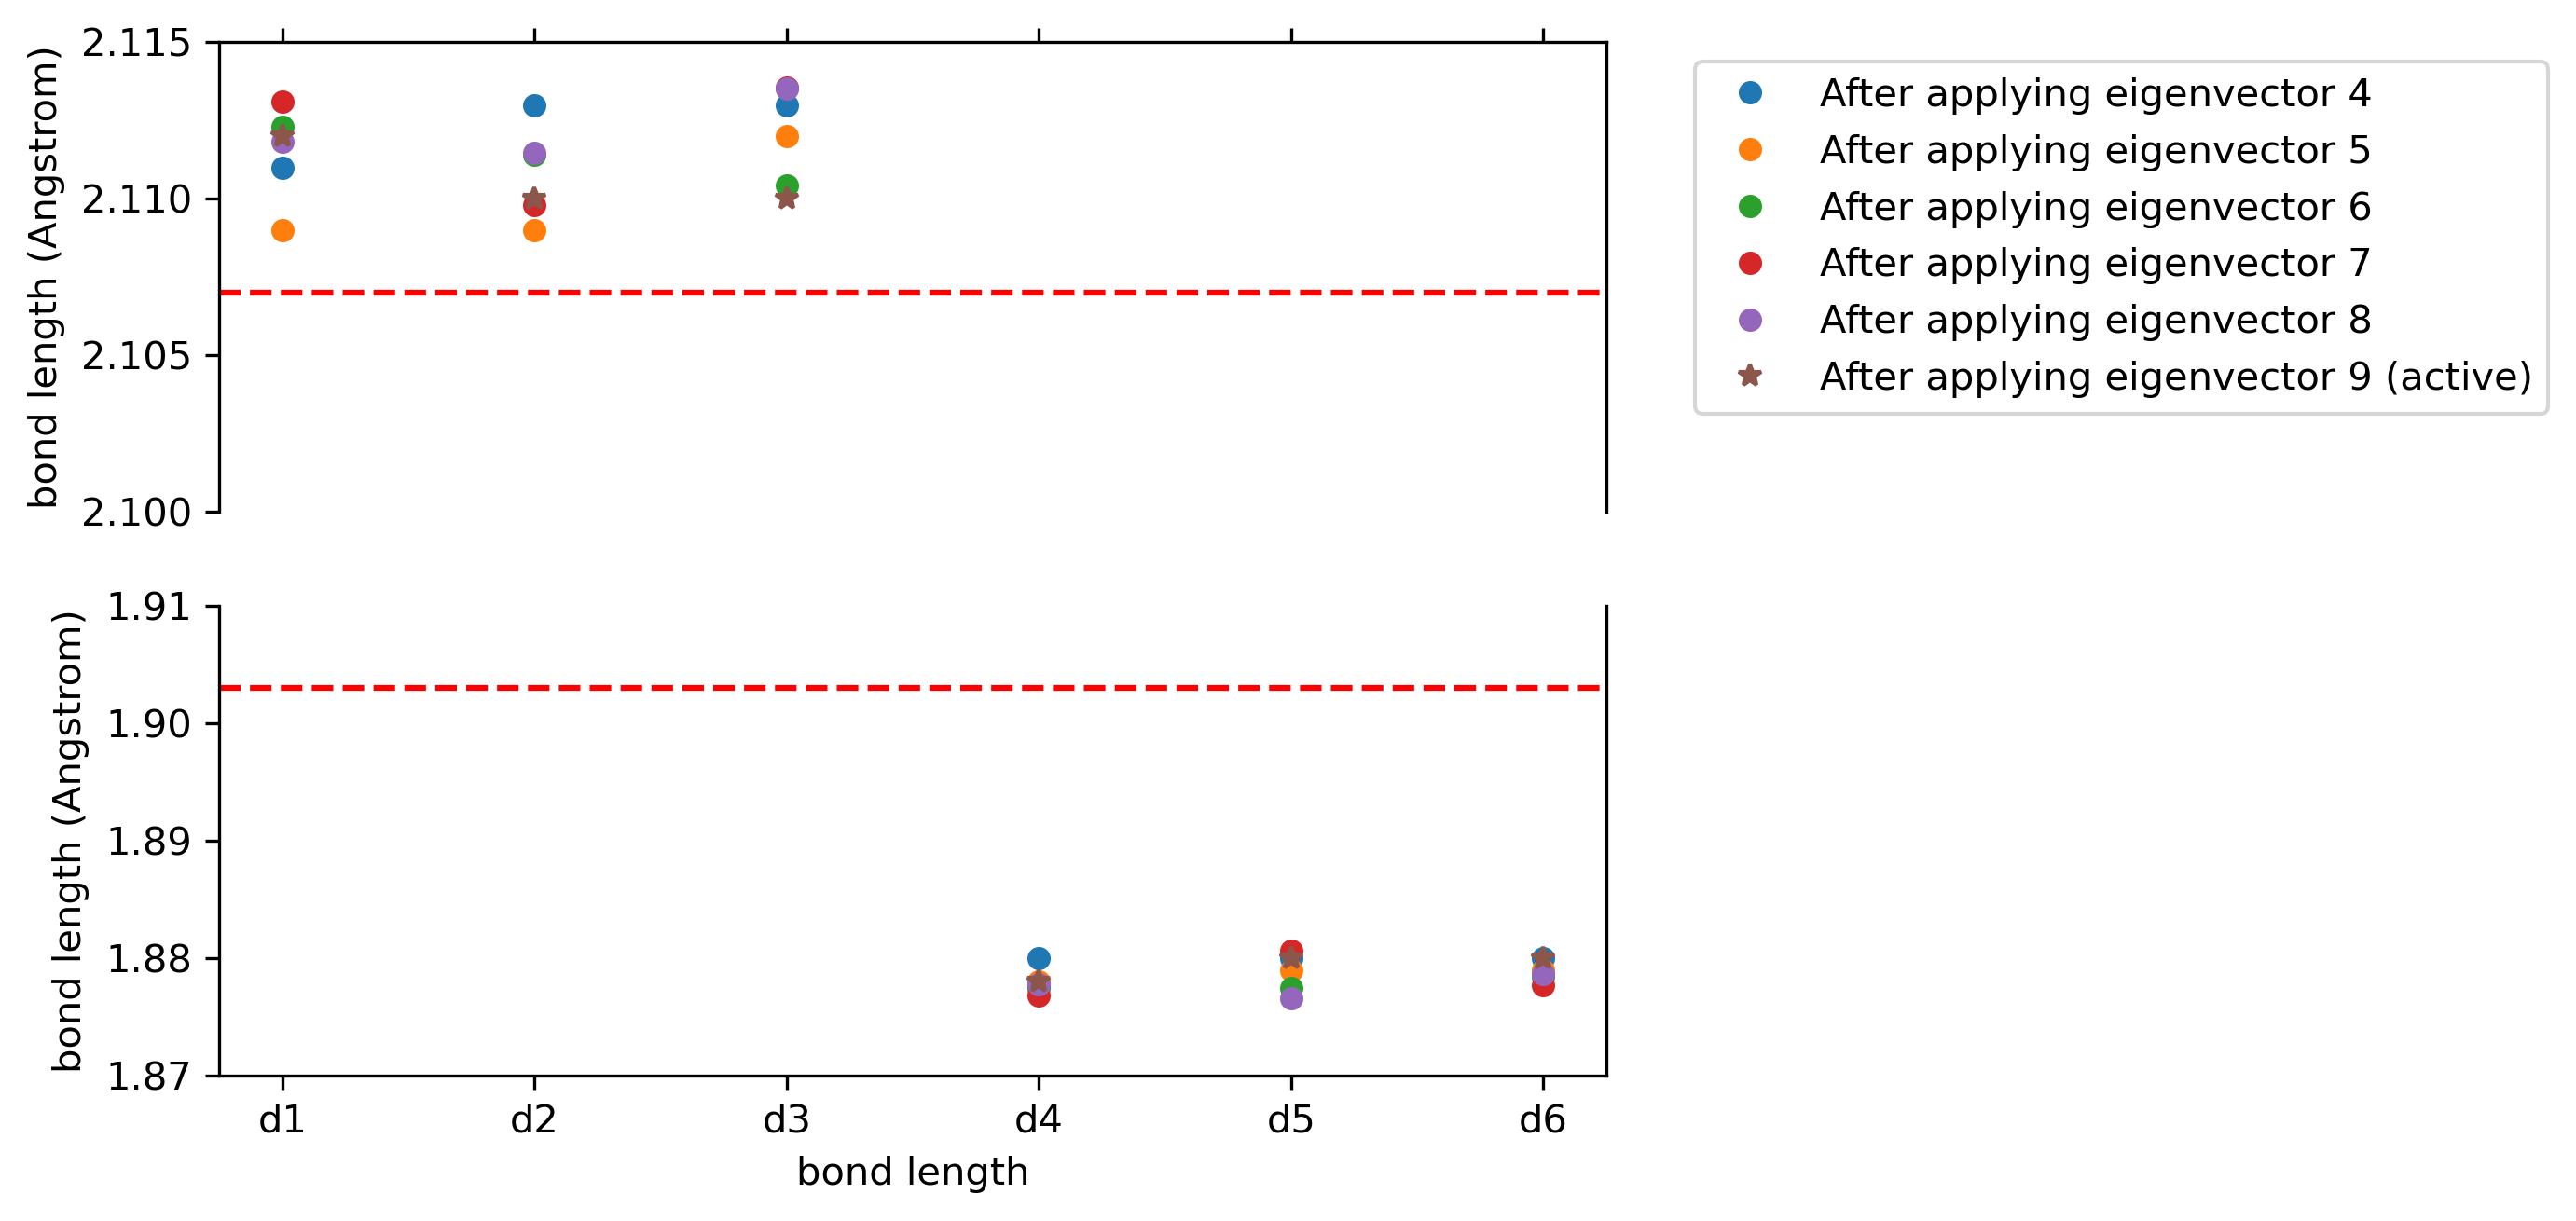

In [196]:
import matplotlib.pyplot as plt
import numpy as np

#! ABINT results
# Create some data
# Create two subplots with different y ranges
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.dpi = 300
# Plot the same data on both subplots
bond_orig = np.array([2.107, 2.107, 2.107, 1.903, 1.903, 1.903])
bond_eig4 = np.array([2.111, 2.113, 2.113, 1.88, 1.88, 1.88])
bond_eig5 = np.array([2.109, 2.109, 2.112, 1.878, 1.879, 1.879])
bond_eig6 = np.array([2.11230, 2.11142, 2.11044, 1.87751, 1.87746, 1.87841])
bond_eig7 = np.array([2.11310, 2.10979, 2.11354, 1.87681, 1.88066, 1.87769])
bond_eig8 = np.array([2.11184, 2.11147, 2.11351, 1.87782, 1.87657, 1.87865])
bond_eig9 = np.array([2.112, 2.110, 2.110, 1.878, 1.880, 1.880])
angle_orig = np.array([80.33, 80.33, 80.33, 99.49, 99.49, 99.49])
angle_eig4 = np.array([79.963, 79.895, 80.009, 99.317, 99.288, 99.367])
angle_eig5 = np.array([80.0655, 80.0653, 80.0235, 99.3659, 99.3759, 99.4659])
angle_eig6 = np.array([79.9739, 80.0177, 79.9862, 99.4035, 99.3780, 99.3861])
angle_eig7 = np.array([80.006, 79.9213, 79.9495, 99.3575, 99.3586, 99.4826])
angle_eig8 = np.array([79.9588, 79.9638, 79.8556, 99.4189, 99.4134, 99.5214])
angle_eig9 = np.array([80.004, 80.061, 80.004, 99.359, 99.268, 99.349])
yy = np.array(["d1", "d2", "d3", "d4", "d5", "d6"])
ax1.axhline(2.107, color='r', linestyle='--')  # Add horizontal line at y=0
ax1.plot(yy, bond_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
ax1.plot(yy, bond_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
ax1.plot(yy, bond_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
ax1.plot(yy, bond_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
ax1.plot(yy, bond_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
ax1.plot(yy, bond_eig9, marker='*', linestyle='None', label='After applying eigenvector 9 (active)', markersize=6)

ax2.axhline(1.903, color='r', linestyle='--')  # Add horizontal line at y=0
ax2.plot(yy, bond_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
ax2.plot(yy, bond_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
ax2.plot(yy, bond_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
ax2.plot(yy, bond_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
ax2.plot(yy, bond_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
ax2.plot(yy, bond_eig9, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Set the y limits - ax1 from 2.05 to 3, ax2 from 1.5 to 1.9
ax1.set_ylim(2.10, 2.115)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xlabel("bond length")
ax1.set_ylabel("bond length (Angstrom)")
ax2.set_ylabel("bond length (Angstrom)")
ax2.set_ylim(1.87, 1.91)

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

plt.show()

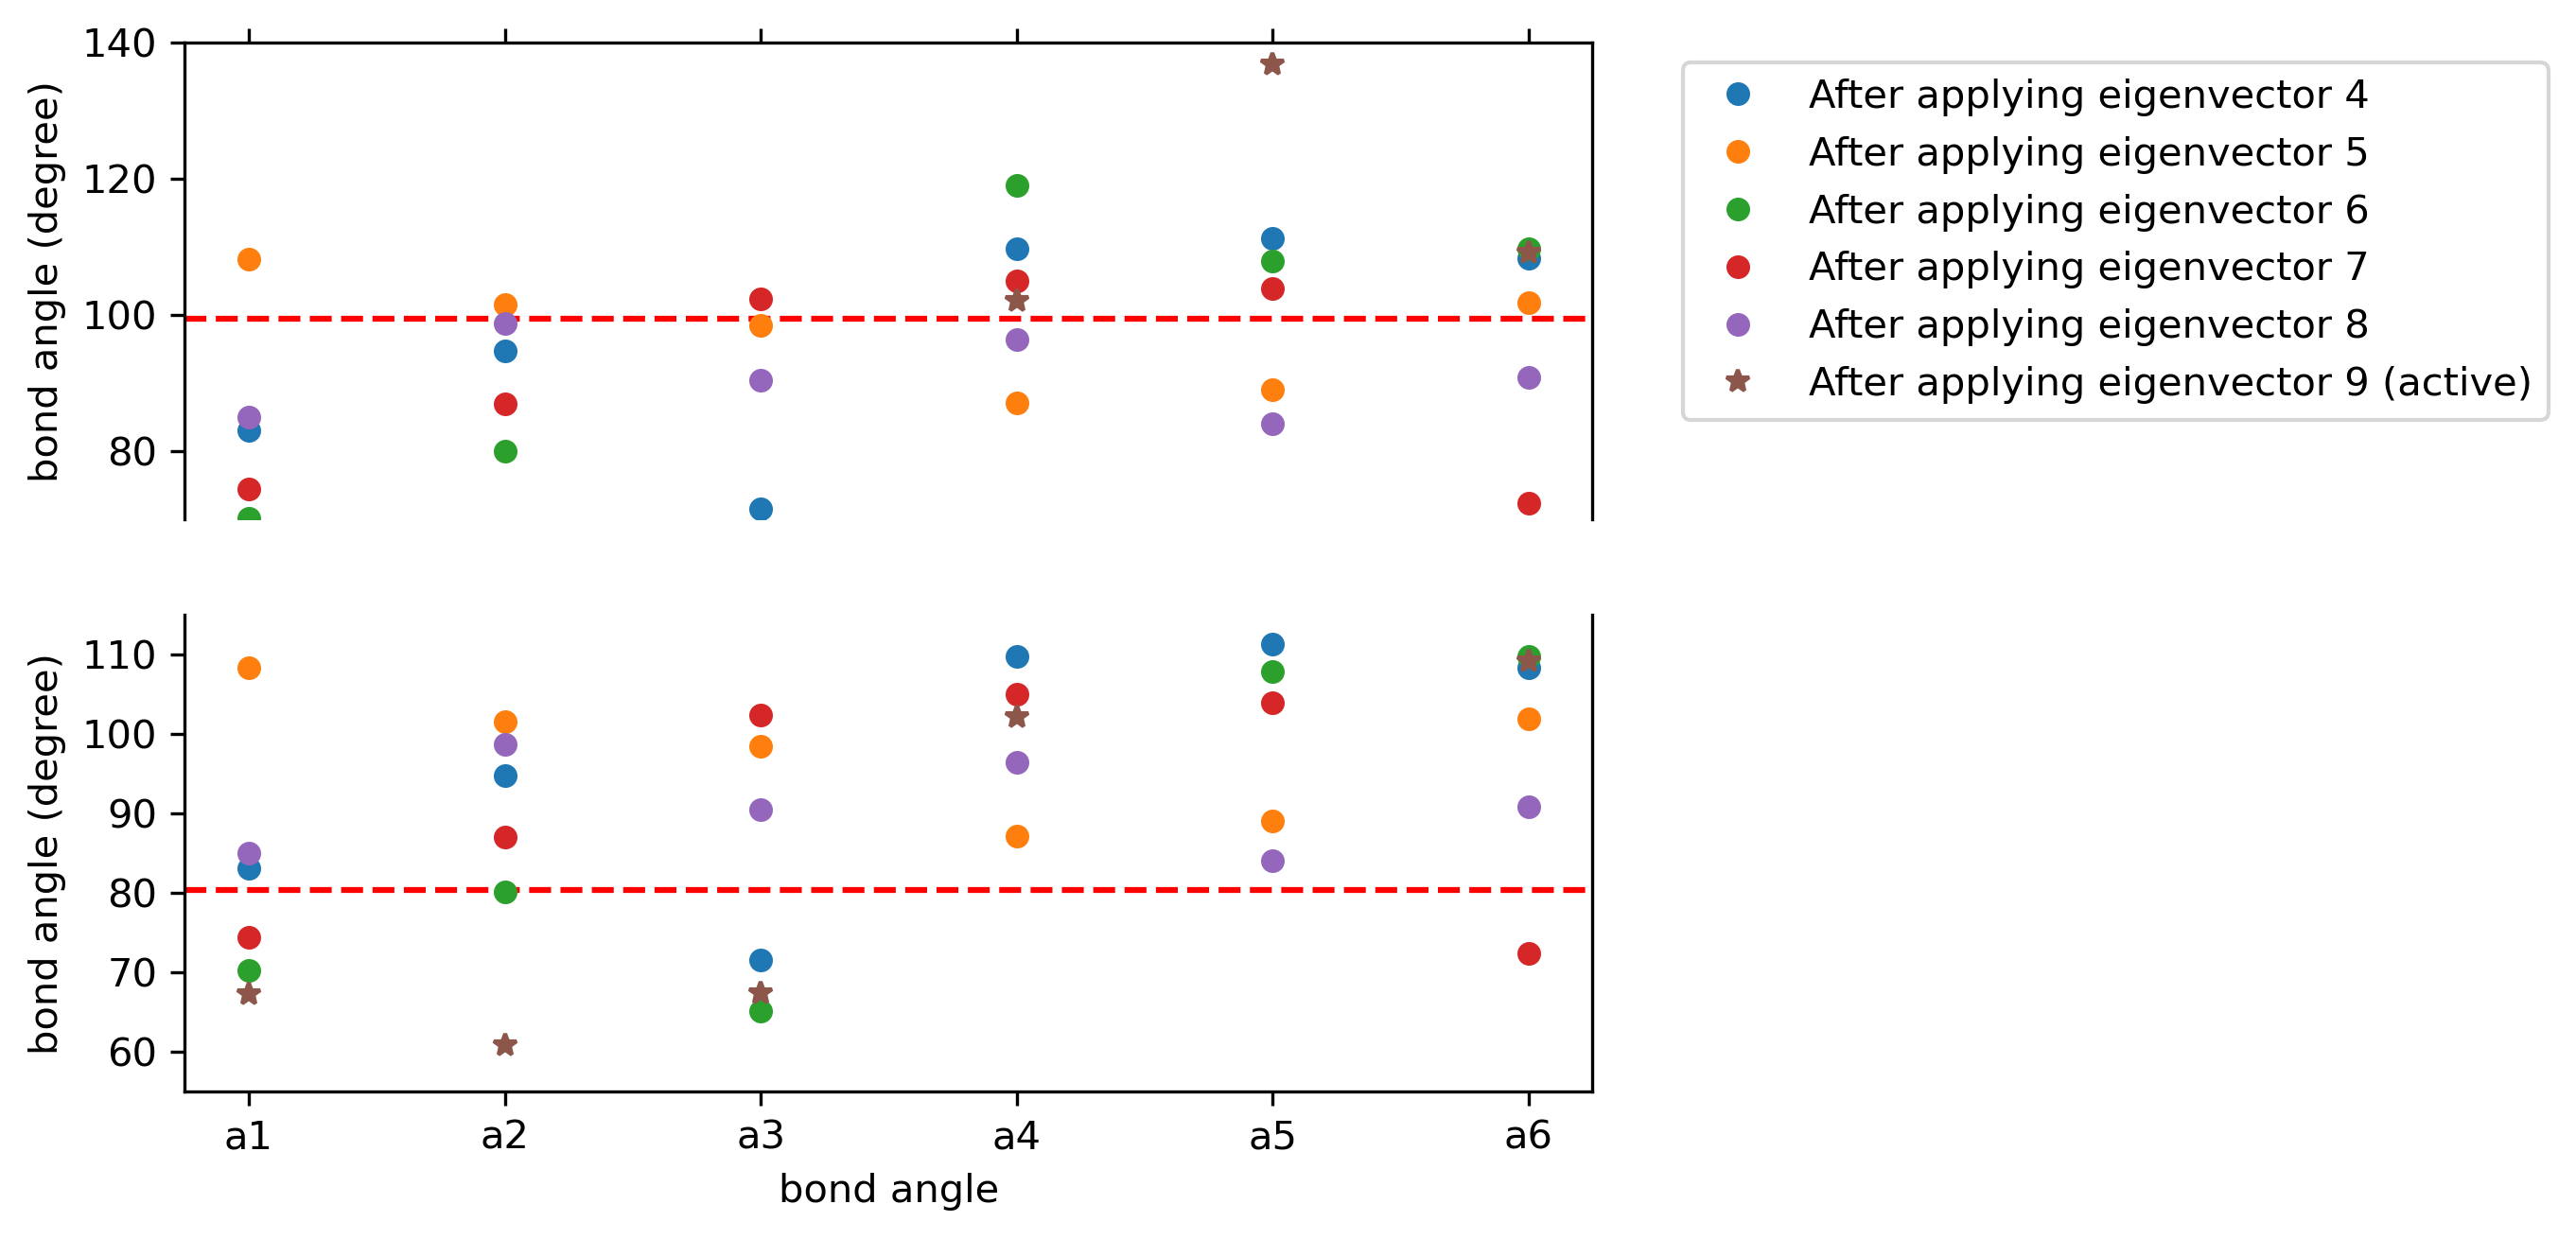

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# bond_orig = np.array([2.107, 2.107, 2.107, 1.903, 1.903, 1.903])
bond_eig4 = np.array([2.10677, 1.729, 1.98586, 1.64035, 1.79351, 1.80378])
bond_eig5 = np.array([1.50956, 1.76132, 2.08258, 2.06343, 2.11417, 2.21510])
bond_eig6 = np.array([2.05896, 2.49751, 2.15049, 1.92962, 1.41859, 2.02933])
bond_eig7 = np.array([1.85828, 2.41290, 1.69752, 2.22552, 1.68957, 2.01328])
bond_eig8 = np.array([2.26287, 2.09217, 1.78061, 1.72941, 1.86949, 2.18695])
bond_eig9 = np.array([2.24242, 2.69189, 2.60321, 2.10317, 1.73414, 1.54072])
# angle_orig = np.array([80.33, 80.33, 80.33, 99.49, 99.49, 99.49])
angle_eig4 = np.array([83.1724, 94.7734, 71.6090, 109.8382, 111.3438, 108.3915])
angle_eig5 = np.array([108.3095, 101.5624, 98.4840, 87.1106, 89.0616, 101.9222])
angle_eig6 = np.array([70.2165, 80.0872, 65.1784, 119.1002, 107.9130, 109.8399])
angle_eig7 = np.array([74.4734, 86.9866, 102.4248, 104.9937, 103.9592, 72.4016])
angle_eig8 = np.array([85.0500, 98.7317, 90.4879, 96.4665, 84.0358, 90.8276])
angle_eig9 = np.array([67.3263, 60.9096, 67.3538, 102.1123, 136.9181, 109.2336])

#! VASP results
# Create some data
# Create two subplots with different y ranges
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.dpi = 300
# Plot the same data on both subplots
ax1.axhline(99.4920, color='r', linestyle='--')  # Add horizontal line at y=0
ax1.plot(yy, angle_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
ax1.plot(yy, angle_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
ax1.plot(yy, angle_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
ax1.plot(yy, angle_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
ax1.plot(yy, angle_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
ax1.plot(yy, angle_eig9, marker='*', linestyle='None', label='After applying eigenvector 9 (active)', markersize=6)

ax2.axhline(80.3289, color='r', linestyle='--')  # Add horizontal line at y=0
ax2.plot(yy, angle_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
ax2.plot(yy, angle_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
ax2.plot(yy, angle_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
ax2.plot(yy, angle_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
ax2.plot(yy, angle_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
ax2.plot(yy, angle_eig9, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Set the y limits - ax1 from 2.05 to 3, ax2 from 1.5 to 1.9
ax1.set_ylim(70, 140)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xlabel("bond angle")
ax1.set_ylabel("bond angle (degree)")
ax2.set_ylabel("bond angle (degree)")
ax2.set_ylim(55, 115)

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

plt.show()

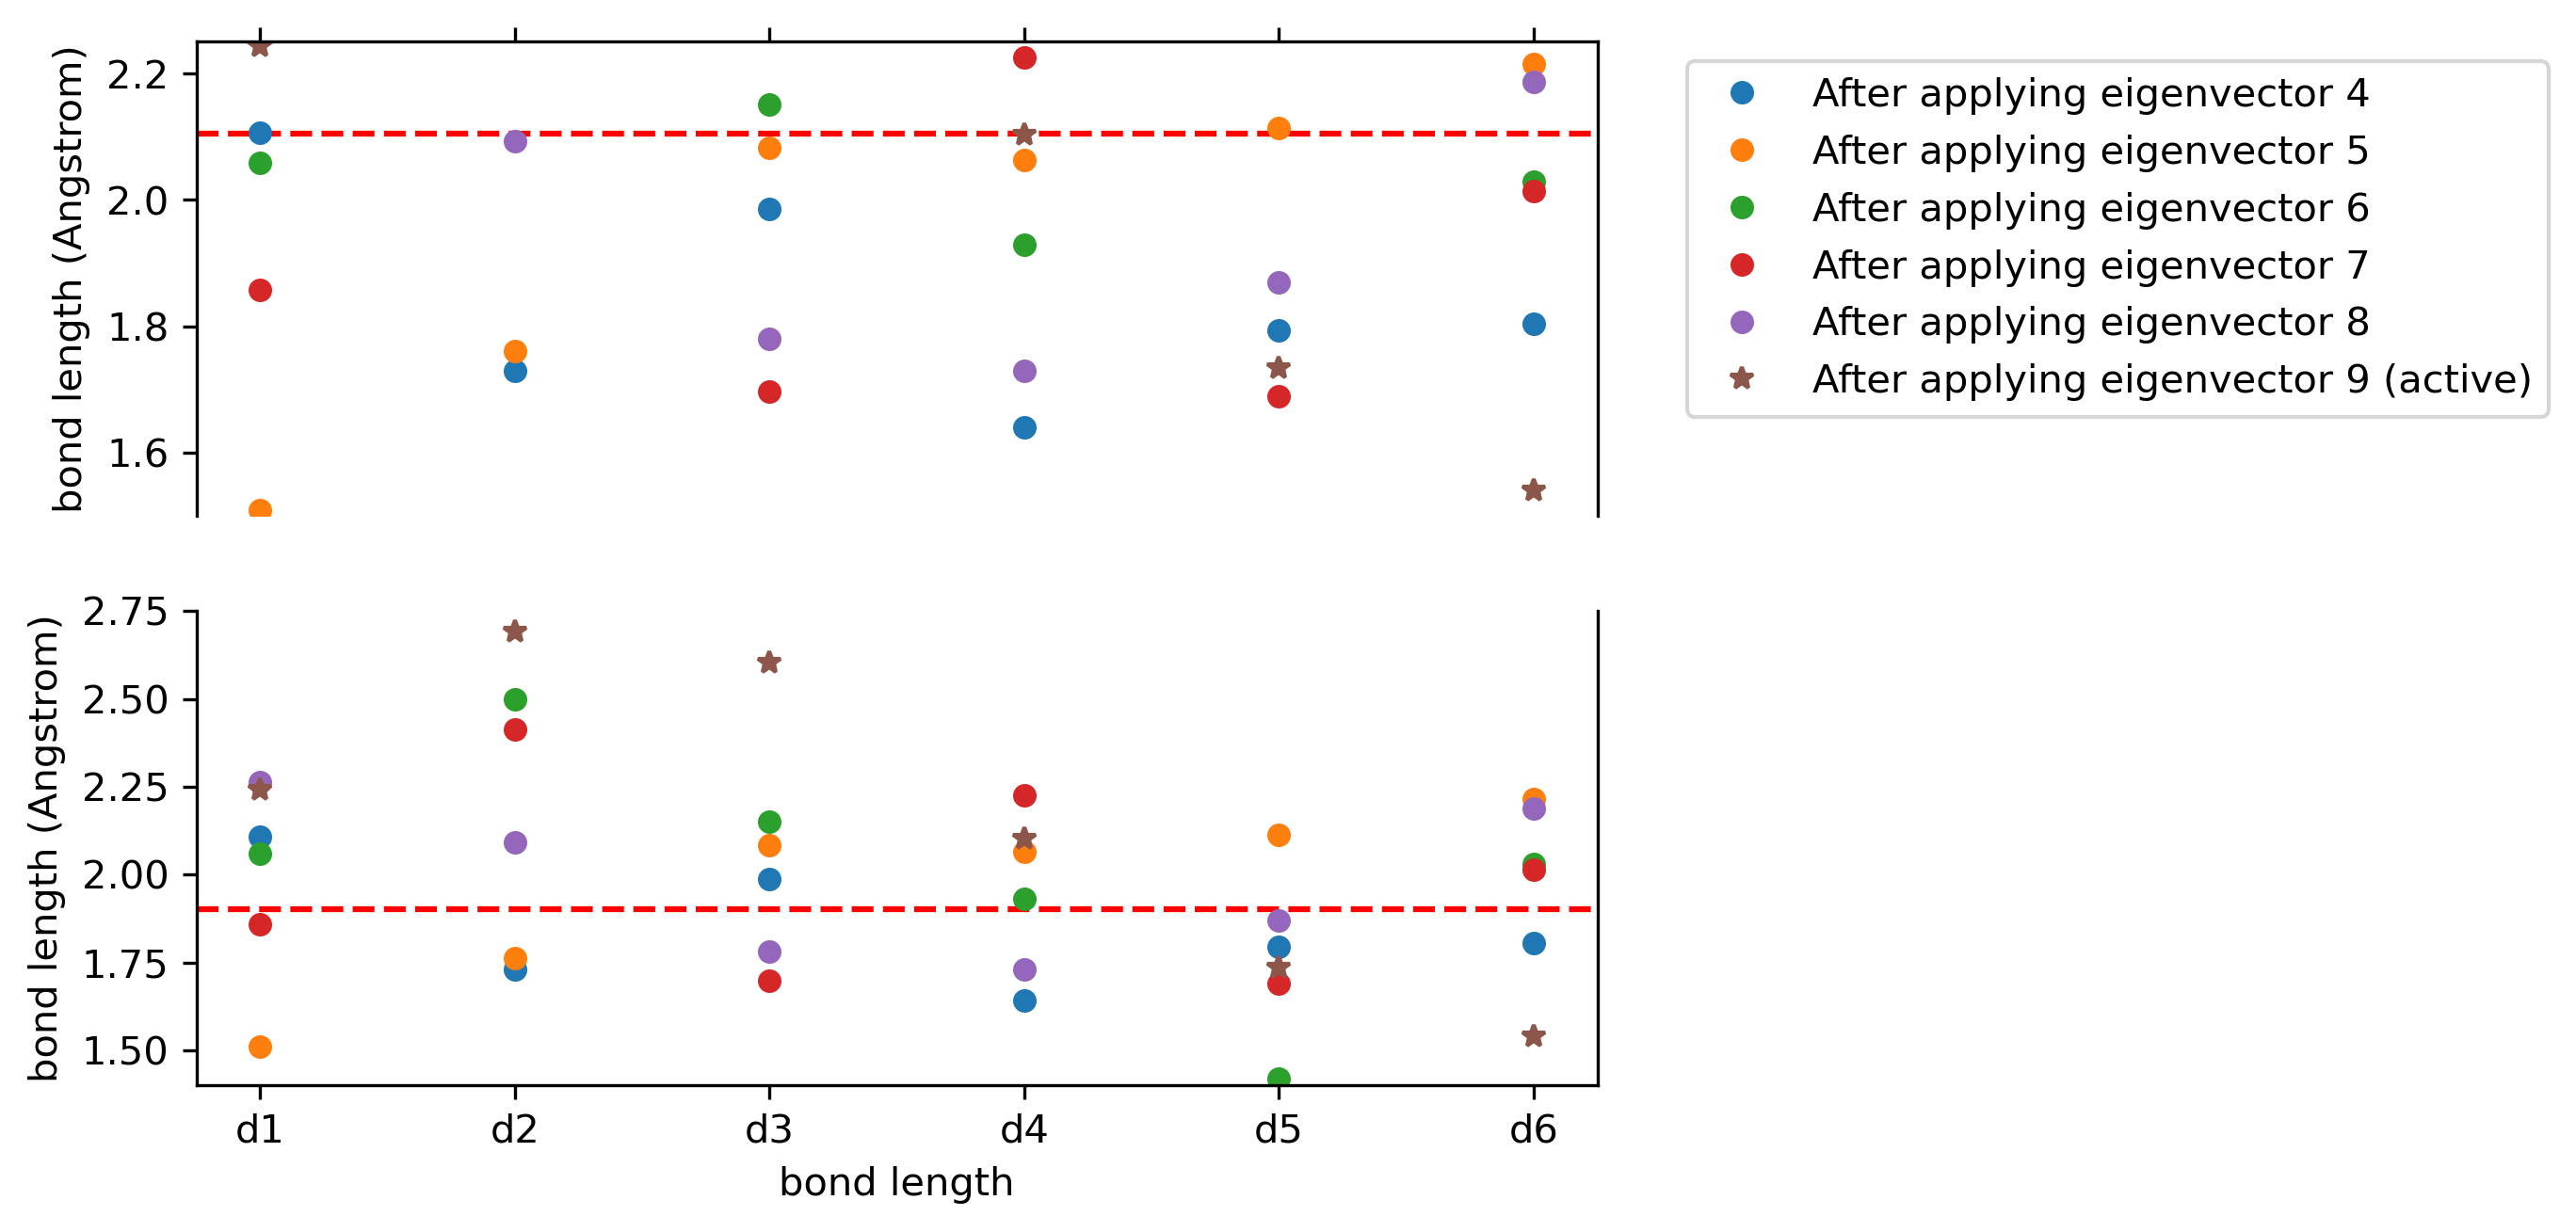

In [193]:
import matplotlib.pyplot as plt
import numpy as np

#! VASP results
# Create some data
# Create two subplots with different y ranges
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.dpi = 300
# Plot the same data on both subplots
yy = np.array(["d1", "d2", "d3", "d4", "d5", "d6"])
ax1.axhline(2.10399, color='r', linestyle='--')  # Add horizontal line at y=0
ax1.plot(yy, bond_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
ax1.plot(yy, bond_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
ax1.plot(yy, bond_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
ax1.plot(yy, bond_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
ax1.plot(yy, bond_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
ax1.plot(yy, bond_eig9, marker='*', linestyle='None', label='After applying eigenvector 9 (active)', markersize=6)

ax2.axhline(1.90045, color='r', linestyle='--')  # Add horizontal line at y=0
ax2.plot(yy, bond_eig4, marker='.', linestyle='None', label='After applying eigenvector 4', markersize=10)
ax2.plot(yy, bond_eig5, marker='.', linestyle='None', label='After applying eigenvector 5', markersize=10)
ax2.plot(yy, bond_eig6, marker='.', linestyle='None', label='After applying eigenvector 6', markersize=10)
ax2.plot(yy, bond_eig7, marker='.', linestyle='None', label='After applying eigenvector 7', markersize=10)
ax2.plot(yy, bond_eig8, marker='.', linestyle='None', label='After applying eigenvector 8', markersize=10)
ax2.plot(yy, bond_eig9, marker='*', linestyle='None', label='After applying eigenvector 9', markersize=6)
# Set the y limits - ax1 from 2.05 to 3, ax2 from 1.5 to 1.9
ax1.set_ylim(1.5, 2.25)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xlabel("bond length")
ax1.set_ylabel("bond length (Angstrom)")
ax2.set_ylabel("bond length (Angstrom)")
ax2.set_ylim(1.4, 2.75)

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

plt.show()

In [199]:
(1.1)**10

2.5937424601000023

In [1]:
from pymatgen import Lattice, Structure
from phonopy import Phonopy
from phonopy.structure.atoms import PhonopyAtoms
from phonopy.units import THzToEv
import numpy as np
import matplotlib.pyplot as plt

# Define the graphene lattice
lattice = Lattice.hexagonal(2.46, 5.0)
structure = Structure(lattice, ["C", "C"], [[1/3, 2/3, 0.5], [2/3, 1/3, 0.5]])

# Convert the pymatgen structure to a phonopy structure
phonopy_structure = PhonopyAtoms(symbols=structure.symbol_set,
                                 positions=structure.cart_coords,
                                 cell=structure.lattice.matrix)

# Define the phonopy object
phonon = Phonopy(phonopy_structure, [[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Set the force constants
# Note: These are dummy values. You would need to calculate the actual force constants.
force_constants = np.random.rand(len(structure), len(structure), 3, 3)
phonon.set_force_constants(force_constants)

# Define the q-points
q_points = np.linspace(0, 1, 1000).reshape(-1, 1)

# Calculate the phonon dispersion
phonon.run_qpoints(q_points, with_eigenvectors=True)
frequencies = phonon.get_qpoints_phonon_frequencies() * THzToEv  # Convert frequencies to eV

# Plot the phonon dispersion
for i in range(frequencies.shape[1]):
    plt.plot(q_points, frequencies[:, i])

plt.xlabel('q')
plt.ylabel('Frequency (eV)')
plt.show()

ImportError: cannot import name 'Lattice' from 'pymatgen' (unknown location)